# **Bank Marketing Campaign**

by:

        1. Federick Dedi Samuel
        2. Nur Hafizah

## **1. Business Understanding**

### **Context**

Sebagai institusi keuangan, Bank X yang merupakan salah satu contoh bank di portugal yang menggantungkan sumber pendapatannya pada bunga dari pinjaman yang disalurkan kepada nasabah. Pinjaman tersebut berasal dari dana yang disimpan oleh nasabah lain seperti deposito berjangka. Semakin banyak nasabah yang menempatkan dana mereka dalam bentuk deposito, semakin besar kapasitas bank untuk memberikan pinjaman dan meningkatkan pendapatannya.

Namun seperti bank lainnya, Bank X harus tetap bersaing untuk mempertahankan dan menarik nasabah. Salah satu strategi yang digunakan adalah melakukan kampanye pemasaran melalui direct marketing. Kampanye ini sering dilakukan melalui direct marketing di mana bank menghubungi calon nasabah secara langsung melalui kontak pribadi, email, telepon seluler, atau saluran komunikasi lainnya untuk menawarkan produk-produk baru seperti deposito dengan bunga kompetitif dan produk pinjaman yang menguntungkan. 

**Target**

`0: Tidak (Tidak melakukan deposito)`

`1: Ya (Melakukan deposito)`

### **Problem Statement**

Tim marketing memegang peranan yang sangat penting karena menjadi salah satu faktor yang secara langsung mempengaruhi keputusan seorang nasabah. Akan tetapi jika tim marketing menghubungi semua nasabah untuk menawarkan produk deposito tersebut maka sistem kerja menjadi tidak efisien dan memerlukan biaya yang tinggi.

Sebaliknya jika tim marketing hanya menghubungi sebagian nasabah, maka mereka berisiko kehilangan nasabah yang sebenarnya berpotensi melakukan deposito. Oleh karena itu tim marketing perlu memiliki kemampuan untuk memprediksi nasabah mana yang akan tertarik untuk membeli deposito. Dengan demikian mereka dapat meminimalisir biaya pemasaran sekaligus memaksimalkan pendapatan dari deposito. 

### **Tujuan**

Berdasarkan permasalahan tersebut tim marketing harus memiliki kemampuan memprediksi dan memahami karakteristik  pelanggan mana yang cenderung melakukan deposito dan yang tidak. sehingga tim marketing dapat merancang program-program yang lebih efisien untuk meningkatkan jumlah pelanggan yang melakukan deposito.

### **Analytic Approach**

Jadi rencana kita adalah menganalisa data dengan tujuan mengidentifikasi pola dan  mengembangkan model klasifikasi yang akan membantu tim marekting memprediksi seorang nasabah yang akan melakukan deposito ataupun tidak. 

### **Evaluation Metric**

Sebelum masuk pada evaluasi metrik terlebih dahulu kita akan memberikan gambaran konsekuensi secara kuantitatif, maka kita akan coba menghitung dampak biaya berdasarkan asumsi berikut:

- Gaji telemarketing di portugal sekitar €2,497 per bulan ([Sumber](https://www.paylab.com/pt/salaryinfo/banking)).
- Hari kerja dalam sebulan 22 Hari ([Sumber](https://www.bluselection.com/blog/2022/12/working-days-in-portugal-everything-you-need-to-know?source=chatgpt.com))
- Jam kerja dalam sehari 8 Jam ([Sumber](https://www.bluselection.com/blog/2022/12/working-days-in-portugal-everything-you-need-to-know?source=chatgpt.com))
- Upah per jam : €2,497/bulan (22 Hari/ bulan x 8 jam/hari) = €14,19 per jam
- Rata-rata durasi telemarketing per orang sekitar 180 detik.
- Rata-rata jumlah deposit per nasabah sekitar 2500 Euro per orang. ([sumber](https://www.ceicdata.com/en/portugal/banking-indicators/pt-deposit-accounts-per-1000-adults-commercial-banks)).
- Interest Rate : 4.5% ([sumber](https://take-profit.org/en/statistics/interest-rate/portugal/))
- Lending Rate : 5.98% ([sumber](https://take-profit.org/en/statistics/interest-rate/portugal/))

Berdasarkan asumsi di atas maka kita dapat coba kuantifikasi konsekuensinya sebagai berikut :

- Hilangnya biaya dan waktu untuk telemarketing --> maka kita menyia-nyiakan biaya sebesar : €14,19 x 180/3600 = 0,709 Euro per orang.
- Hilangnya potensi pendapatan --> maka kita kehilangan potensi pendapatan sebesar :(5.98% - 4.5%) * 2500 Euro = 37 Euro per orang.

Berdasarkan asumsi di atas sehingga kita bisa menyimpulkan bahwa:

**Type 1 error: False Positive (Nasabah yang sebenarnya tidak akan melakukan deposito tetapi diprediksi akan melakukan deposito).**

Konsekuensi: akan mengakibatkan pemborosan biaya telemarketing. Biaya telemarketing yang terbuang: €14,19 x 180/3600 = 0,709 Euro per orang.

**Type 2 error: False Negative (Nasabah yang sebenarnya akan melakukan deposito tetapi diprediksi tidak akan melakukan deposito).**

Konsekuensi: akan menyebabkan kehilangan potensi pendapatan dari nasabah yang sebenarnya akan melakukan deposito. Potensi pendapatan yang hilang karena kegagalan mengidentifikasi nasabah yang sebenarnya akan melakukan deposito = (5.98% - 4.5%) * 2500 Euro = 37 Euro per orang


Berdasarkan konsekuensi di atas tujuan kita adalah membuat model prediksi yang dapat mengurangi False Negatif (Nasabah yang sebenarnya akan melakukan deposito tetapi diprediksi tidak akan melakukan deposito) dan juga meminimalisir biaya telemarketing yang tidak tepat. Oleh karena itu, metrik yang kita gunakan adalah 'Recall' karena false negatif memiliki kerugian yang lebih besar daripada false positif.

## **2. Data Understanding**

- Sumber dataset : https://archive.ics.uci.edu/ml/datasets/bank+marketing
- Setiap baris data mempresentasikan informasi dari seorang nasabah.
- Dataset tidak seimbang.
- Terdapat missing value dalam dataset yang diberi label `Unknown`.

### **Attribute Information**


| Kolom | Tipe Data | Deskripsi |
| --- | --- | --- |
| Age | Integer | Umur dari nasabah |
| Job | Object | Pekerjaan dari nasabah |
| Marital | Object | Status pernikahan dari nasabah |
| Eduction | Object | Tingkat pendidikan dari nasabah  |
| Default | Object | Apakah nasabah memiliki catatan kegagalan pembayaran (default) pada pinjaman atau kredit |
| Housing | Object | Apakah nasabah memiliki pinjaman rumah |
| Loan | Object | Apakah nasabah memiliki pinjaman pribadi |
| Contact | Object | Jenis kontak yang digunakan dalam kampanye pemasaran |
| Month | Object | Bulan saat kontak terakhir dilakukan |
| Day_of_week | Object | Hari dalam seminggu saat kontak terakhir dilakukan |
| Duration | Integer | Durasi kontak terakhir dalam detik |
| Campaign | Integer | Jumlah kontak yang dilakukan selama kampanye tertentu |
|Pdays |Integer | Jumlah hari sejak kontak terakhir dalam kampanye sebelumnya |
|Previous |Integer | Jumlah kontak yang dilakukan sebelum kampanye saat ini |
|Poutcome |Object | Hasil dari kampanye pemasaran sebelumnya |
|Emp.var.rate |Float | Tingkat variasi dari variabel ekonomi |
|Cons.price.idx |Float | Indeks harga konsumen |
|Cons.conf.idx |Float | Indeks kepercayaan konsumen |
|Euribor3m |Float | Suku bunga EURIBOR tiga bulan |
|Nr.employed |Float | Jumlah karyawan |
|Y | Object | Variabel target |

### **Import Library**

In [117]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import time

#EDA
from matplotlib.lines import Line2D
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

# traintest split
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from collections import Counter
from sklearn.model_selection import cross_val_score

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler,OrdinalEncoder
from imblearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Imbalance Data
from imblearn.over_sampling import SMOTEN
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter

# Evaluation
from sklearn.metrics import confusion_matrix,recall_score, precision_score, f1_score, make_scorer, ConfusionMatrixDisplay, PrecisionRecallDisplay
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

### **Eksplor Data**

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dataset ini terdiri dari 41.188 baris dan 21 kolom.

In [4]:
bank_info = pd.DataFrame({
    'Feature': bank.columns.values,
    'Data_type': bank.dtypes.values,
    'N_unique': bank.nunique().values,
    'Unique_sample': [bank[col].drop_duplicates().sample(min(5, bank[col].nunique()), replace=False).values for col in bank.columns]
})

bank_info


,Feature,Data_type,N_unique,Unique_sample
0,age,int64,78,"[70, 47, 44, 94, 64]"
1,job,object,12,"[admin., services, student, retired, blue-collar]"
2,marital,object,4,"[divorced, unknown, married, single]"
3,education,object,8,"[basic.6y, illiterate, university.degree, basi..."
4,default,object,3,"[yes, unknown, no]"
5,housing,object,3,"[unknown, no, yes]"
6,loan,object,3,"[yes, no, unknown]"
7,contact,object,2,"[telephone, cellular]"
8,month,object,10,"[jul, apr, mar, dec, jun]"
9,day_of_week,object,5,"[tue, thu, wed, fri, mon]"


- Dataset ini terdiri dari 21 fitur dengan tipe data yang bervariasi, termasuk numerik (int64, float64) dan kategorikal (object).
Ini menunjukkan bahwa analisis dan pemrosesan data harus mencakup teknik-teknik untuk menangani kedua jenis data tersebut, seperti encoding untuk data kategorikal dan normalisasi untuk data numerik.
- Fitur age memiliki 78 nilai unik, menunjukkan variasi yang cukup besar dalam usia nasabah.
Fitur duration memiliki jumlah nilai unik tertinggi, yaitu 1544, yang menunjukkan bahwa durasi panggilan telemarketing sangat bervariasi.
Fitur-fitur seperti job (12 nilai unik), marital (4 nilai unik), dan education (8 nilai unik) memberikan gambaran tentang karakteristik demografis nasabah.
- Fitur-fitur kategorikal seperti job, marital, education, dan contact menunjukkan jumlah kategori yang berbeda, yang perlu di-encoding sebelum digunakan dalam model prediksi.
Fitur contact memiliki hanya 2 nilai unik (telephone, cellular), yang menunjukkan bahwa kontak dilakukan melalui dua saluran utama.
- Fitur-fitur seperti emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, dan nr.employed memberikan informasi tentang kondisi ekonomi yang mungkin mempengaruhi keputusan nasabah untuk melakukan deposito.
- Fitur y adalah target variabel dengan dua nilai unik (no, yes), menunjukkan apakah nasabah melakukan deposito atau tidak.
Ini adalah variabel yang akan diprediksi oleh model, dan distribusinya akan mempengaruhi pemilihan model dan metrik evaluasi.

In [5]:
bank.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


- Beberapa fitur menunjukkan variabilitas yang signifikan (misalnya: duration, campaign) yang dapat membantu dalam memprediksi perilaku nasabah.
- Distribusi Usia: Nasabah bank memiliki rentang usia yang luas, yang dapat mempengaruhi preferensi dan respons mereka terhadap kampanye pemasaran.
- Hanya sebagian kecil nasabah yang melakukan deposito, menunjukkan ketidakseimbangan kelas yang harus ditangani dalam model prediksi untuk menghindari bias.
- Fitur ekonomi makro seperti emp.var.rate, cons.price.idx, dan euribor3m menunjukkan kondisi ekonomi yang dapat mempengaruhi keputusan nasabah.

## **3. Exploratory Data Analysis**

### **Numerik**

**Distribusi Data**

In [6]:
numerik = bank.select_dtypes(include='number')
numerik

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


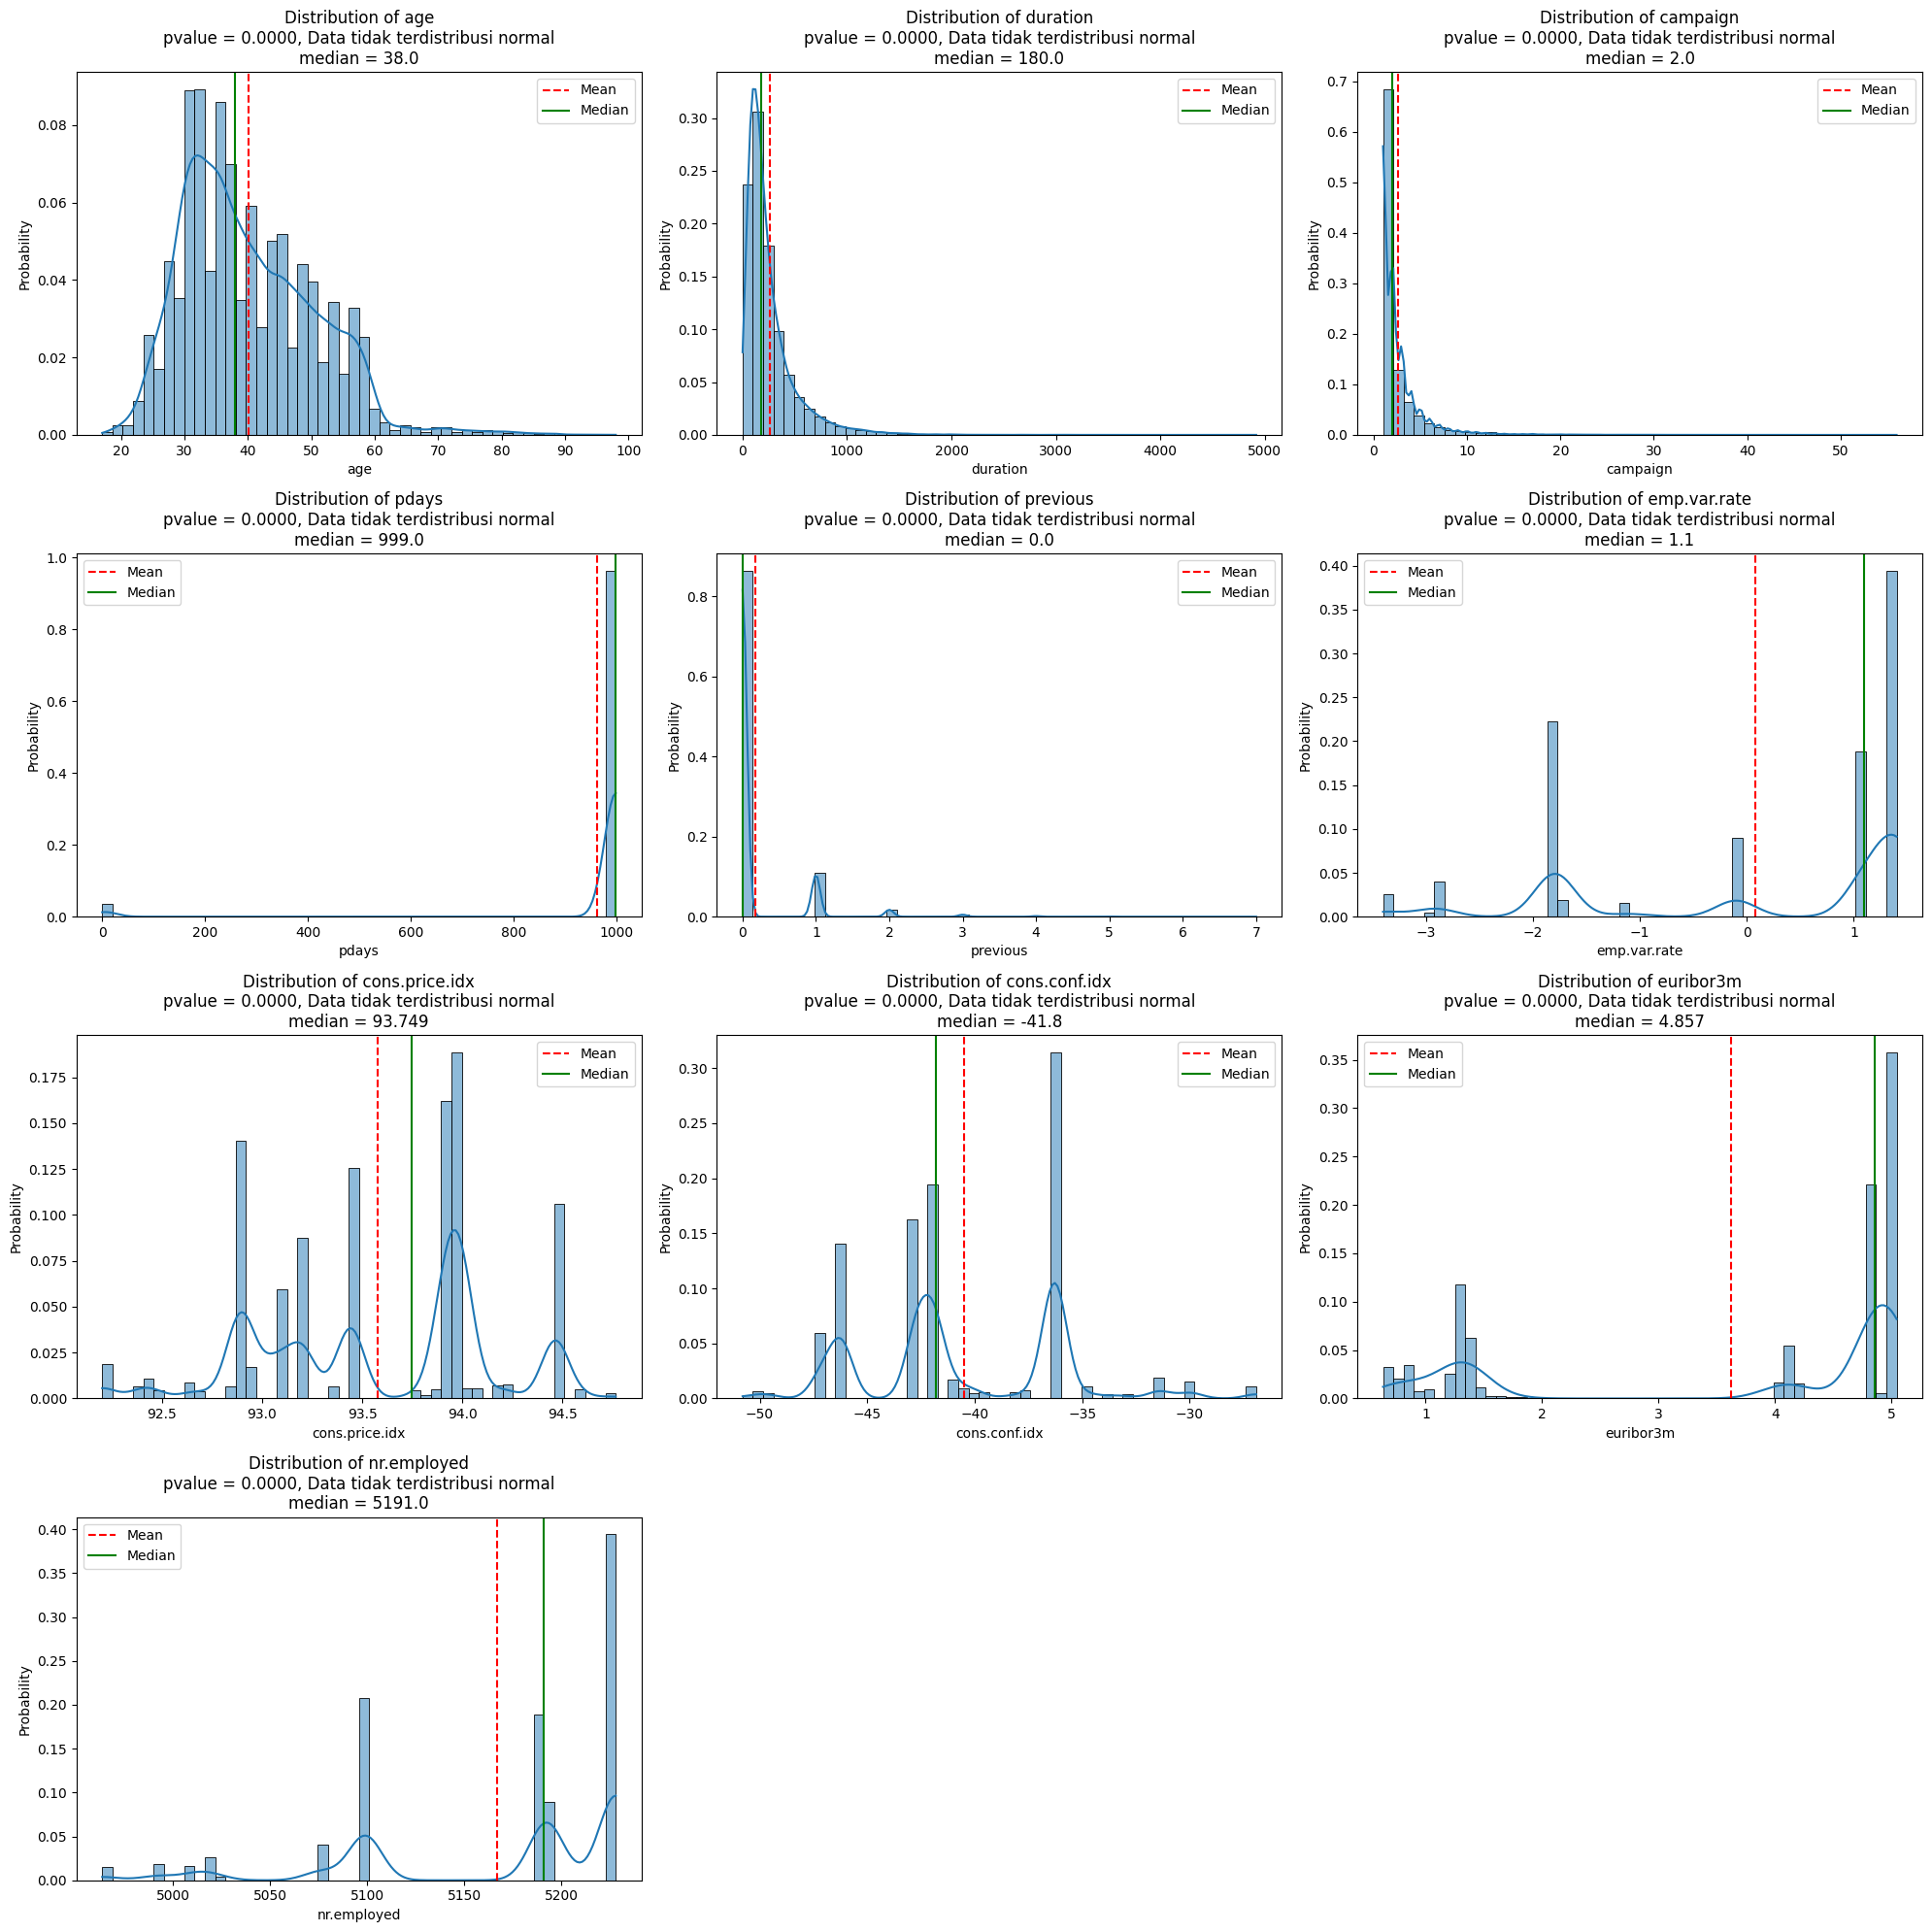

In [7]:
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

for i, col in enumerate(numerik.columns):
    ax1 = axes[i // cols, i % cols]
    
    pvalue = normaltest(numerik[col])[1]
    if pvalue > 0.05:
        teks = (f'pvalue = {pvalue:.4f}, Data terdistribusi normal')
    else:
        teks = (f'pvalue = {pvalue:.4f}, Data tidak terdistribusi normal')
    
    ax1.set_title(f"Distribution of {col}\n{teks}\nmedian = {numerik[col].median()}", color="black")
    
    sns.histplot(numerik[col], ax=ax1, stat="probability", kde=True, bins=50)
    ax1.axvline(numerik[col].mean(), color='r', linestyle='--', label='Mean')
    ax1.axvline(numerik[col].median(), color='g', linestyle='-', label='Median')
    ax1.legend()

for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, informasi numerik yang dapat diperoleh antara lain:

- Seluruh data numerik berdistribusi tidak normal.
- `age` mayoritas nasabah berada dalam rentang usia 20-60 tahun.
- `duration` mayoritas durasi kontak terjadi dalam rentang 0 hingga 1000 detik.
- `campaign` mayoritas nasabah dihubungi antara 1 hingga 3 kali selama periode kampanye.
- Mayoritas nasabah tidak dihubungi dalam campaign sebelumnya, seperti yang tercermin dalam distribusi kolom `previous`.
- Harga barang-barang konsumsi rumah tangga, yang direpresentasikan oleh `cons.price.idx`, mengalami variasi antara 5 hingga 8%.
- Distribusi `euribor3m` sebagian besar kontak terjadi saat tingkat euribor di atas 3.7.
- `nr.employed` menunjukkan dua kelompok distribusi, satu di atas 5150 dan yang lainnya di bawah 5150, memberikan gambaran tentang variasi jumlah karyawan dalam dataset.

**Korelasi**

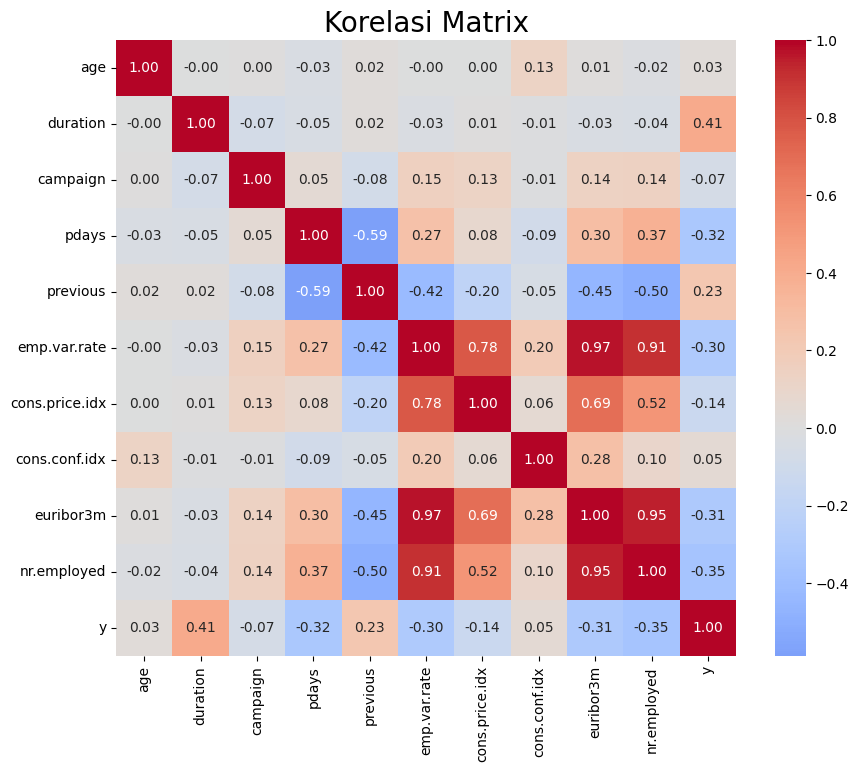

In [8]:
numerik_corr = bank.select_dtypes(include=['float64', 'int64'])
numerik_corr['y'] = bank['y'].apply(lambda x: 1 if x == 'yes' else 0)
corr_matrix = numerik_corr.corr()

plt.figure(figsize=(10, 8))
plt.title('Korelasi Matrix', fontsize=20)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.show()


- Fitur `age` dan `campaign` tidak menunjukkan korelasi yang tinggi terhadi target `y`. 
- Kita juga dapat melihat bahwa target memiliki korelasi positif moderate dengan fitur `duration`. Hal ini kemungkinan disebabkan panggilan dengan (duration=0) dianggap sebagai panggilan yang tidak terjawab atau gagal, diasumsikan tidak melakukan deposito (target=0) sehingga adanya korelasi.

### **Kategori**

Mari kita lihat feature kategori-kategorinya dan bagaimana 'y' didistribusikan di antara kategori-kategori tersebut.

In [9]:
categorical_cols = bank.select_dtypes(include=['object']).columns.tolist()

data = {
    'column': categorical_cols,
    'Number of unknown': [bank[col].str.contains('unknown').sum() for col in categorical_cols],
    '% unknown': [(bank[col].str.contains('unknown').sum() / len(bank) * 100).round(2) for col in categorical_cols]
}

df_unknown = pd.DataFrame(data)
df_unknown


,column,Number of unknown,% unknown
0,job,330,0.80
1,marital,80,0.19
2,education,1731,4.20
3,default,8597,20.87
4,housing,990,2.40
5,loan,990,2.40
6,contact,0,0.00
7,month,0,0.00
8,day_of_week,0,0.00
9,poutcome,0,0.00


Berdasarkan tabel-tabel di atas, dataset tidak memiliki missing value. Namun terdapat beberapa kolom yang memiliki label "Unknown". Persentase "Unknown" pada masing-masing kolom cukup rendah yaitu kurang dari 5%, kecuali kolom `Default` yang memiliki persentase sebesar 20%.

**Membuat kolom `ageGroup` untuk mencari nasabah deposito berdasarkan kelompok umur**

In [10]:
def age_group(x):
    if x < 13:
        age_group = 'child'
    elif 13 <= x < 21:
        age_group = 'teenage'
    elif 21 <= x < 31:
        age_group = 'young adult'
    elif 31 <= x < 45:
        age_group = 'adult'
    elif 45 <= x < 60:
        age_group = 'middle-aged'
    else:
        age_group = 'Elderly'
        
    return age_group

bank.insert(1, 'ageGroup',value ='')

bank['ageGroup'] = bank['age'].apply(age_group)

In [11]:
categorical_cols.append('ageGroup')

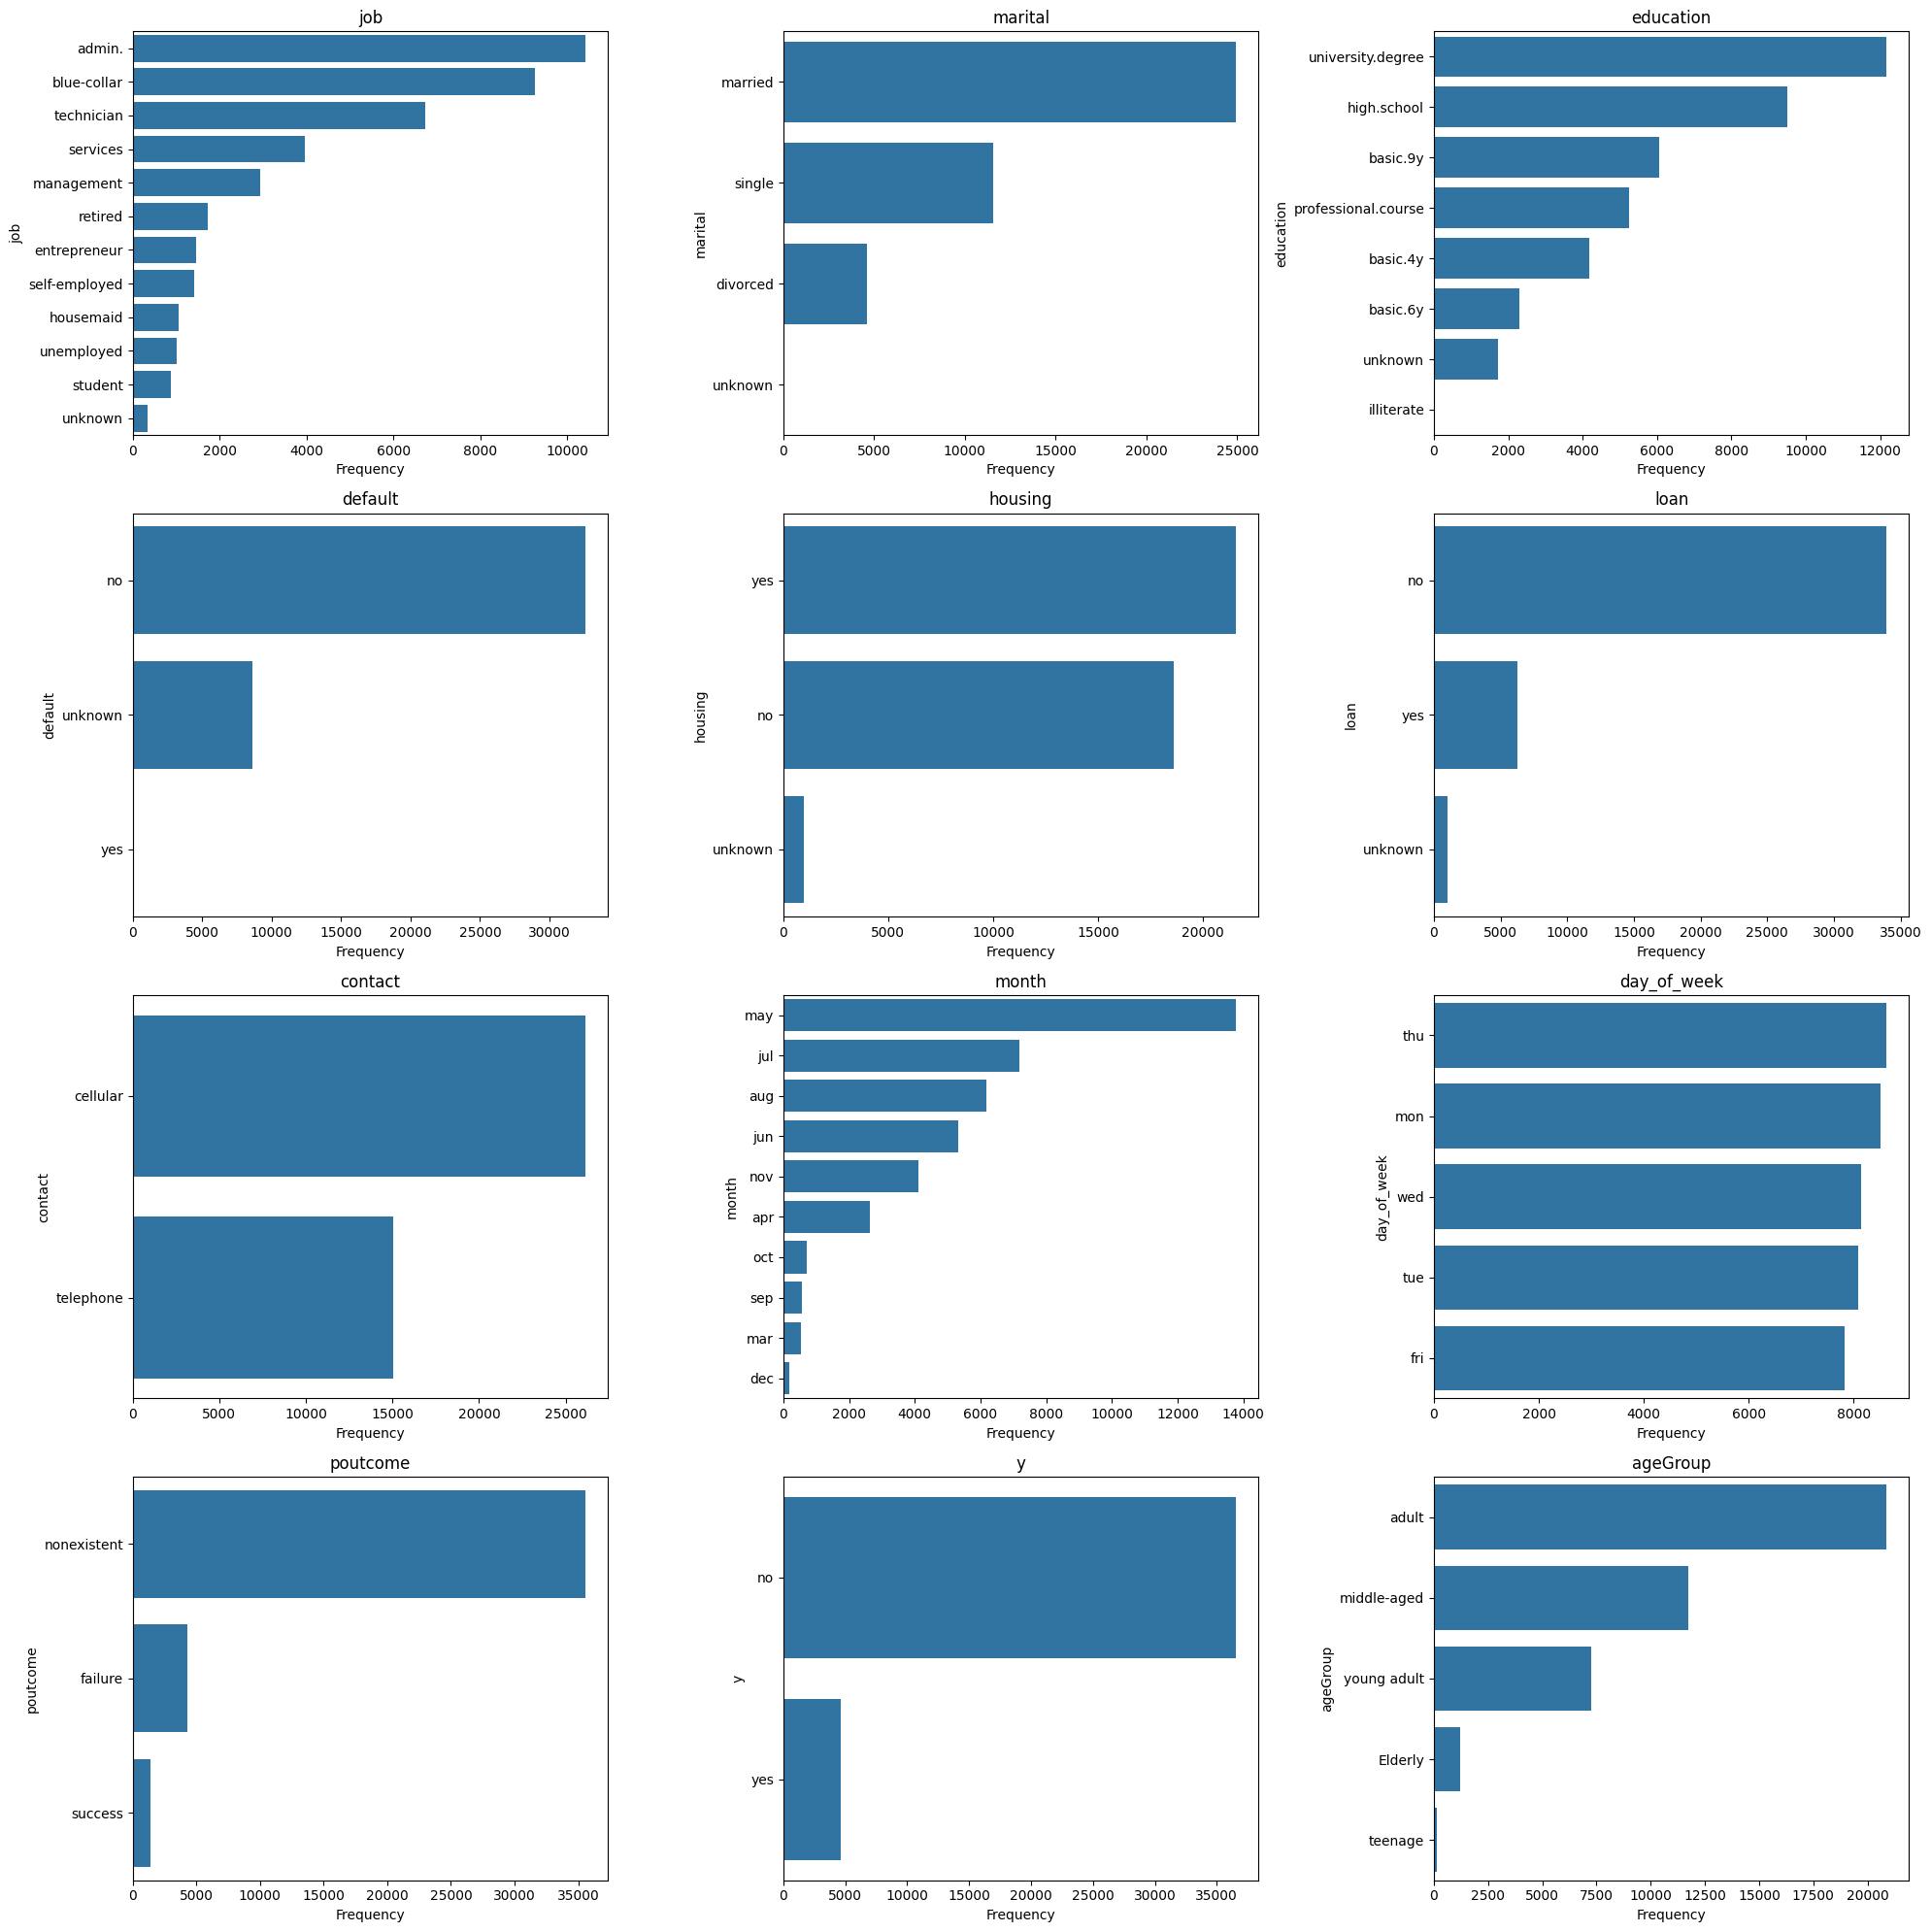

In [12]:
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

for i, col in enumerate(categorical_cols):
    ax = axes[i // cols, i % cols]
    value_counts = bank[col].value_counts()
    sns.barplot(x=value_counts.values, y=value_counts.index, ax=ax, orient='horizontal')
    ax.set_xlabel('Frequency')
    ax.set_ylabel(col)
    ax.set_title(f'{col}')
    ax.tick_params(axis='y', rotation=0) 

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, karakteristik nasabah dapat dirangkum sebagai berikut:

- Data tidak seimbang karena fitur target `y` didominasi `tidak`.
- `job` mayoritas nasabah bekerja sebagai admin, blue-collar, technician dan services.
- `marital` status pernikahan mayoritas nasabah adalah menikah dan single.
- `education` mayoritas nasabah memiliki tingkat pendidikan sarjana dan SMA.
- `housing` mayoritas nasabah memiliki pinjaman rumah.
- `loan` mayoritas nasabah memiliki pinjaman pribadi.
- `contact` mayoritas nasabah dihubungi melalui ponsel seluler.
- `month` mayoritas nasabah terakhir dihubungi pada bulan mei.
- `poutcome` Sebagian kecil nasabah memiliki informasi tentang hasil kampanye sebelumnya, di mana hanya sekitar 13.6% yang mengetahuinya, dan hanya sekitar 3.3% yang mengalami keberhasilan. 
- `age group` mayoritas nasabah berada dalam kelompok usia 'adult' dan 'middle-aged' (31 - 60 tahun).



### **Karakteristik nasabah yang melakukan deposito**

untuk memprediksi nasabah mana yang melakukan deposito perlu kita memahami karakteristik dari nasabah yang melakukan deposito di antaranya sebagai berikut:

1. Segmentasi yang tepat.
2. Kontak dan durasi.
3. Waktu pemasaran yang tepat untuk menjalankan kampanye pemasaran.
4. Detail kampanye sebelumnya untuk menyempurnakan strategi pemasaran.
5. Indikator ekonomi.

#### **1. Segmentasi yang tepat:**

**Berapakah presentase nasabah melakukan deposito berdasarkan kelompok usia?**

In [13]:
bank_agegroup = bank.groupby(['ageGroup', 'y']).size().unstack().reset_index()
bank_agegroup['total'] = bank_agegroup['yes'] + bank_agegroup['no']
bank_agegroup['subscribed(%)'] = (bank_agegroup['yes'] / bank_agegroup['total'] * 100).round(2)
bank_agegroup['unsubscribed(%)'] = (bank_agegroup['no'] / bank_agegroup['total'] * 100).round(2)
bank_agegroup = bank_agegroup.sort_values(by='subscribed(%)', ascending=False)
bank_agegroup

y,ageGroup,no,yes,total,subscribed(%),unsubscribed(%)
3,teenage,83,57,140,40.71,59.29
0,Elderly,721,472,1193,39.56,60.44
4,young adult,6176,1067,7243,14.73,85.27
1,adult,18905,1966,20871,9.42,90.58
2,middle-aged,10663,1078,11741,9.18,90.82


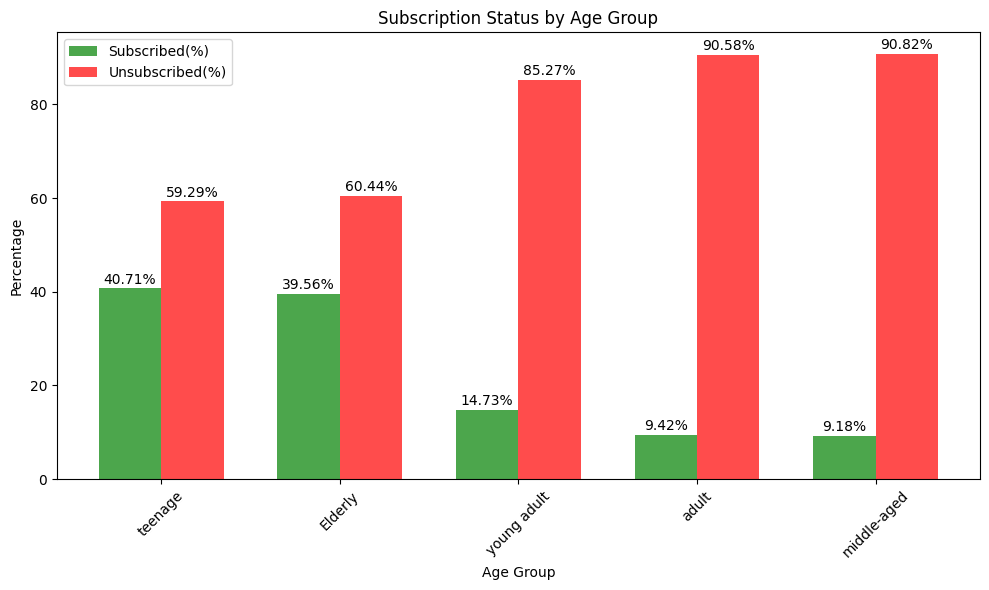

In [14]:
# Urutkan data berdasarkan subscribed_percentage secara menurun
bank_agegroup_sorted = bank_agegroup.sort_values(by='subscribed(%)', ascending=False)

# Data
age_groups = bank_agegroup_sorted['ageGroup']
subscribed_percentages = bank_agegroup_sorted['subscribed(%)']
unsubscribed_percentages = bank_agegroup_sorted['unsubscribed(%)']
bar_width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

index = np.arange(len(age_groups))
bar1 = ax.bar(index - bar_width/2, subscribed_percentages, bar_width, color='green', alpha=0.7, label='Subscribed(%)')
bar2 = ax.bar(index + bar_width/2, unsubscribed_percentages, bar_width, color='red', alpha=0.7, label='Unsubscribed(%)')

# Add values on bars
for i, (subscribed, unsubscribed) in enumerate(zip(subscribed_percentages, unsubscribed_percentages)):
    ax.text(i - bar_width/2, subscribed + 1, f'{subscribed}%', ha='center', color='black', fontsize=10)
    ax.text(i + bar_width/2, unsubscribed + 1, f'{unsubscribed}%', ha='center', color='black', fontsize=10)

# Labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage')
ax.set_title('Subscription Status by Age Group')
ax.set_xticks(index)
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


**Insight**

Kelompok usia yang memiliki presentase tertinggi dalam langganan adalah `teenage` sebesar 40.71% dan `elderly` sebesar 39.56%. Hal ini menunjukkan bahwa remaja dan lansia memiliki minat yang signifikan dalam layanan bank. Oleh karena itu, strategi pemasaran dapat lebih difokuskan pada `teenage` dan `elderly` untuk meningkatkan jumlah pelanggan.

**Pekerjaan apa yang paling umum di antara nasabah yang berlangganan deposito berjangka?**

In [16]:
bank_job = bank.groupby(['job', 'y']).size().unstack().reset_index()
bank_job['total'] = bank_job['yes'] + bank_job['no']
bank_job['%subscribed'] = (bank_job['yes'] / bank_job['total'] * 100).round(2)
bank_job = bank_job.sort_values(by='%subscribed', ascending=False)
bank_job

y,job,no,yes,total,%subscribed
8,student,600,275,875,31.43
5,retired,1286,434,1720,25.23
10,unemployed,870,144,1014,14.20
0,admin.,9070,1352,10422,12.97
4,management,2596,328,2924,11.22
11,unknown,293,37,330,11.21
9,technician,6013,730,6743,10.83
6,self-employed,1272,149,1421,10.49
3,housemaid,954,106,1060,10.00
2,entrepreneur,1332,124,1456,8.52


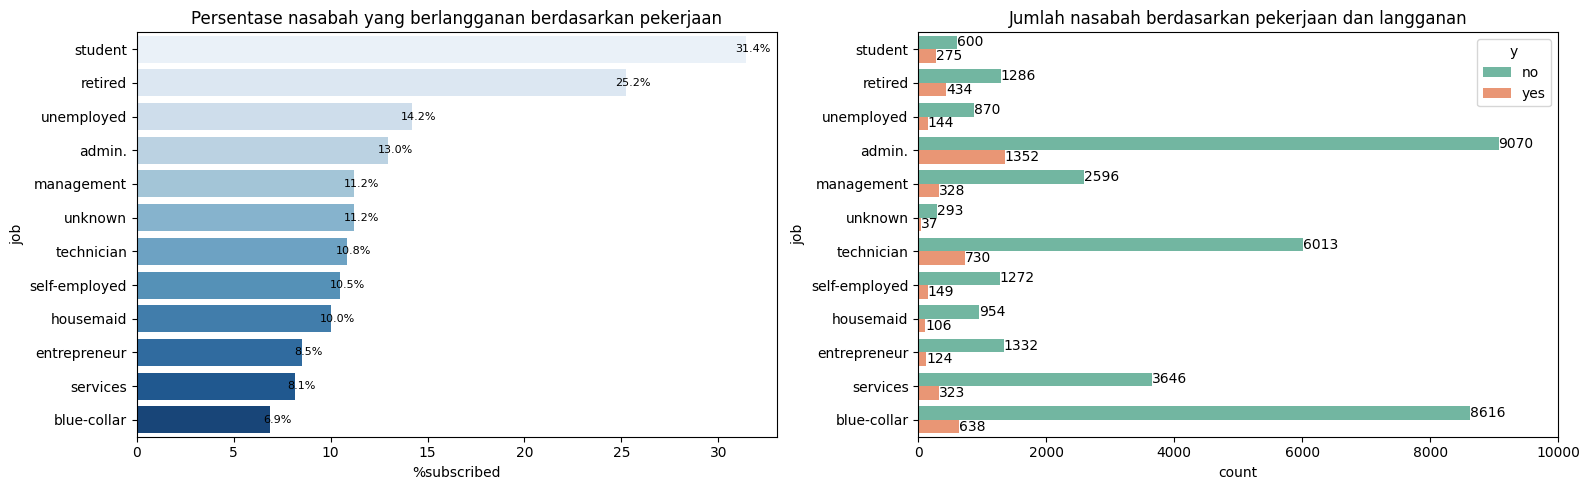

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

ax1 = sns.barplot(data=bank_job, y='job', x='%subscribed', hue='job', ax=axes[0], palette='Blues', legend=False)
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate('{:.1f}%'.format(width), (p.get_x() + width, p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')
ax1.set_title('Persentase nasabah yang berlangganan berdasarkan pekerjaan')

ax2 = sns.countplot(data=bank, y='job', hue='y', order=bank_job['job'], ax=axes[1], palette='Set2')
ax2.set_title('Jumlah nasabah berdasarkan pekerjaan dan langganan')
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xlim(0, 10000)

plt.tight_layout()
plt.show()

**Insight**

Melihat dari data di atas, pekerjaan yang memiliki tingkat keberhasilan dengan presentasi yang tinggi adalah `student` sebesar 31.4% dan `retired` sebesar 25.2%. Hal ini menunjukkan bahwa pelanggan dari kalangan `student` dan `retired` cenderung lebih condong untuk melakukan deposito. Kita mengasumsikan bahwa `student` mungkin melakukan deposito sebagai cara yang aman untuk menyimpan uang mereka dalam jangka waktu tertentu, mungkin sebagai persiapan untuk masa depan setelah lulus. Sedangkan `retired` mungkin melakukan deposito sebagai cara untuk mempertahankan pendapatan tetap dan menghindari risiko yang terkait dengan investasi yang lebih berisiko, seiring dengan kebutuhan hidup yang stabil dalam masa pensiun. Oleh karena itu, strategi pemasaran dapat lebih difokuskan pada segmen pelanggan dengan pekerjaan `student` dan `retired`.

**Berapakah presentase nasabah melakukan deposito berdasarkan status pernikahan?**

In [19]:
bank_marital = bank.groupby(['marital', 'y']).size().unstack().reset_index()
bank_marital['total'] = bank_marital['yes'] + bank_marital['no']
bank_marital['%subscribed'] = (bank_marital['yes'] / bank_marital['total'] * 100).round(2)
bank_marital = bank_marital.sort_values(by='%subscribed', ascending=False)
bank_marital

y,marital,no,yes,total,%subscribed
3,unknown,68,12,80,15.00
2,single,9948,1620,11568,14.00
0,divorced,4136,476,4612,10.32
1,married,22396,2532,24928,10.16


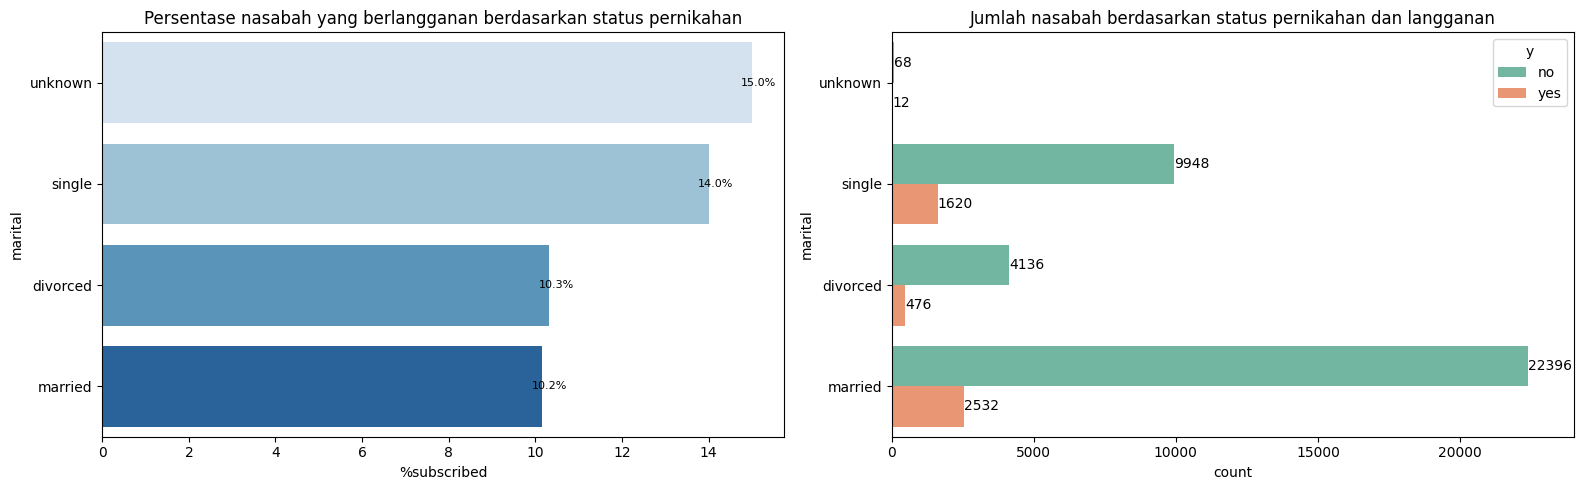

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

ax1 = sns.barplot(data=bank_marital, y='marital', x='%subscribed', hue='marital', ax=axes[0], palette='Blues', legend=False)
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate('{:.1f}%'.format(width), (p.get_x() + width, p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')
ax1.set_title('Persentase nasabah yang berlangganan berdasarkan status pernikahan')

ax2 = sns.countplot(data=bank, y='marital', hue='y', order=bank_marital['marital'], ax=axes[1], palette='Set2')
ax2.set_title('Jumlah nasabah berdasarkan status pernikahan dan langganan')
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xlim(0, 24000)

plt.tight_layout()
plt.show()

**Insight**

Status pernikahan yang memiliki persentase tertinggi adalah `single` sebesar 14%. Ini menunjukkan bahwa individu yang belum menikah cenderung lebih aktif dalam melakukan deposito dibandingkan dengan individu dengan status pernikahan lainnya. Hal ini mungkin disebabkan oleh fakta bahwa individu yang belum menikah lebih cenderung fokus pada kestabilan keuangan pribadi dan mengambil langkah-langkah untuk memastikan keamanan finansial di masa depan, tanpa harus mempertimbangkan kebutuhan dan tanggung jawab keuangan keluarga. Strategi pemasaran dapat difokuskan pada segmen ini untuk menarik lebih banyak nasabah.

**Berapakah presentase nasabah melakukan deposito berdasarkan pendidikan?**

In [21]:
bank_education = bank.groupby(['education', 'y']).size().unstack().reset_index()
bank_education['total'] = bank_education['yes'] + bank_education['no']
bank_education['%subscribed'] = (bank_education['yes'] / bank_education['total'] * 100).round(2)
bank_education = bank_education.sort_values(by='%subscribed', ascending=False)
bank_education

y,education,no,yes,total,%subscribed
4,illiterate,14,4,18,22.22
7,unknown,1480,251,1731,14.50
6,university.degree,10498,1670,12168,13.72
5,professional.course,4648,595,5243,11.35
3,high.school,8484,1031,9515,10.84
0,basic.4y,3748,428,4176,10.25
1,basic.6y,2104,188,2292,8.20
2,basic.9y,5572,473,6045,7.82


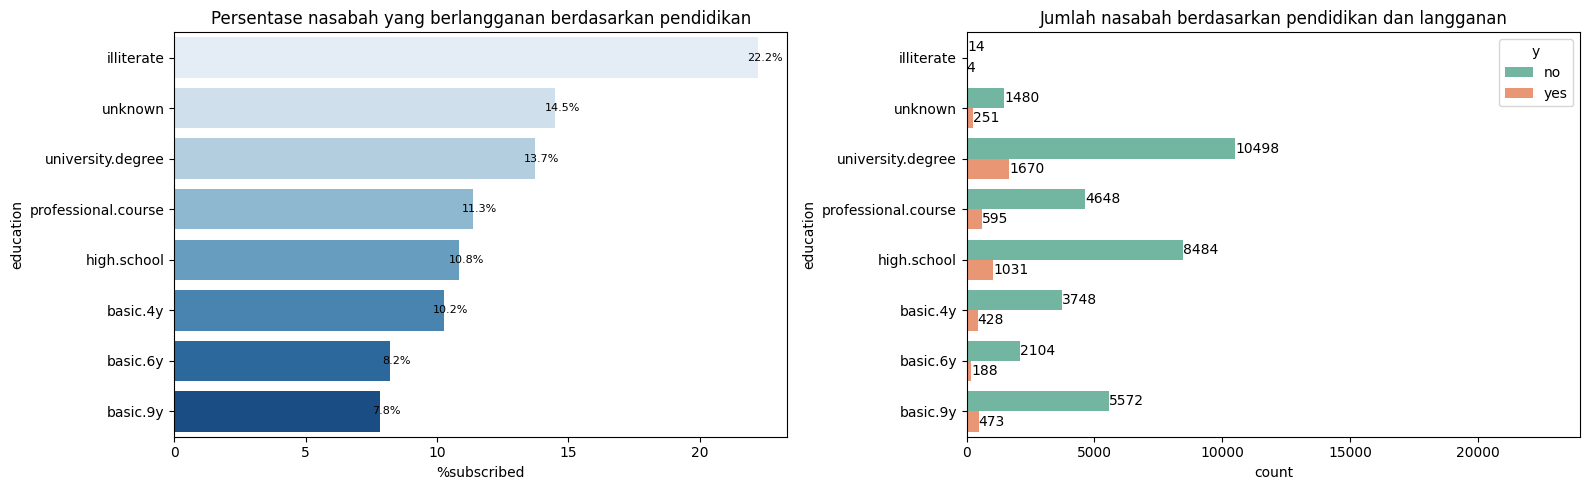

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

ax1 = sns.barplot(data=bank_education, y='education', x='%subscribed', hue='education', ax=axes[0], palette='Blues', legend=False)
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate('{:.1f}%'.format(width), (p.get_x() + width, p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')
ax1.set_title('Persentase nasabah yang berlangganan berdasarkan pendidikan')

ax2 = sns.countplot(data=bank, y='education', hue='y', order=bank_education['education'], ax=axes[1], palette='Set2')
ax2.set_title('Jumlah nasabah berdasarkan pendidikan dan langganan')
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xlim(0, 24000)

plt.tight_layout()
plt.show()

**Insight**

Berdasarkan grafik di atas, menunjukkan adanya pola menarik terkait perilaku deposito berdasarkan tingkat pendidikan. Meskipun presentase tertinggi terdapat pada kelompok "illiterate" harus diperhatikan bahwa jumlah individu dalam kelompok ini sangat sedikit hanya 18 orang. Oleh karena itu keakuratan statistik dari presentase ini dapat dipertanyakan karena ukuran sampel yang kecil.

Namun saat melihat kelompok pendidikan lainnya, pola yang menarik terlihat. Kelompok dengan tingkat pendidikan yang lebih tinggi seperti "university.degree" dan "professional.course" memiliki persentase yang signifikan dalam melakukan deposito masing-masing sebesar 13.72% dan 11.35%. Ini mungkin menunjukkan bahwa individu dengan pendidikan yang lebih tinggi cenderung memiliki kesadaran finansial yang lebih baik atau akses ke informasi tentang manfaat melakukan deposito.

Di sisi lain kelompok dengan pendidikan dasar seperti "basic.4y", "basic.6y", dan "basic.9y" juga menunjukkan persentase yang cukup tinggi dalam melakukan deposito, meskipun lebih rendah dibandingkan dengan kelompok pendidikan yang lebih tinggi. Hal ini menunjukkan bahwa faktor-faktor lain seperti stabilitas keuangan atau kebiasaan menabung juga mempengaruhi keputusan individu dalam melakukan deposito.

Sehingga strategi pemasaran dan layanan perbankan haruslah inklusif dan memperhatikan berbagai kelompok pendidikan. Meskipun individu dengan pendidikan tinggi mungkin menjadi target utama tidak boleh diabaikan bahwa individu dengan pendidikan dasar juga memiliki potensi untuk menjadi nasabah yang berpotensi. Oleh karena itu, pendekatan yang holistik dalam merancang layanan perbankan dan edukasi keuangan dapat membantu mencapai kesuksesan yang lebih besar dalam menarik dan mempertahankan nasabah.

#### **2. Kontak & Durasi:**

**Metode kontak mana yang paling efektif dalam mendapatkan nasabah yang berlangganan deposito berjangka?**

In [23]:
bank_contact = bank.groupby(['contact', 'y']).size().unstack().reset_index()
bank_contact['total'] = bank_contact['yes'] + bank_contact['no']
bank_contact['%subscribed'] = (bank_contact['yes'] / bank_contact['total'] * 100).round(2)
bank_contact = bank_contact.sort_values(by='%subscribed', ascending=False)
bank_contact

y,contact,no,yes,total,%subscribed
0,cellular,22291,3853,26144,14.74
1,telephone,14257,787,15044,5.23


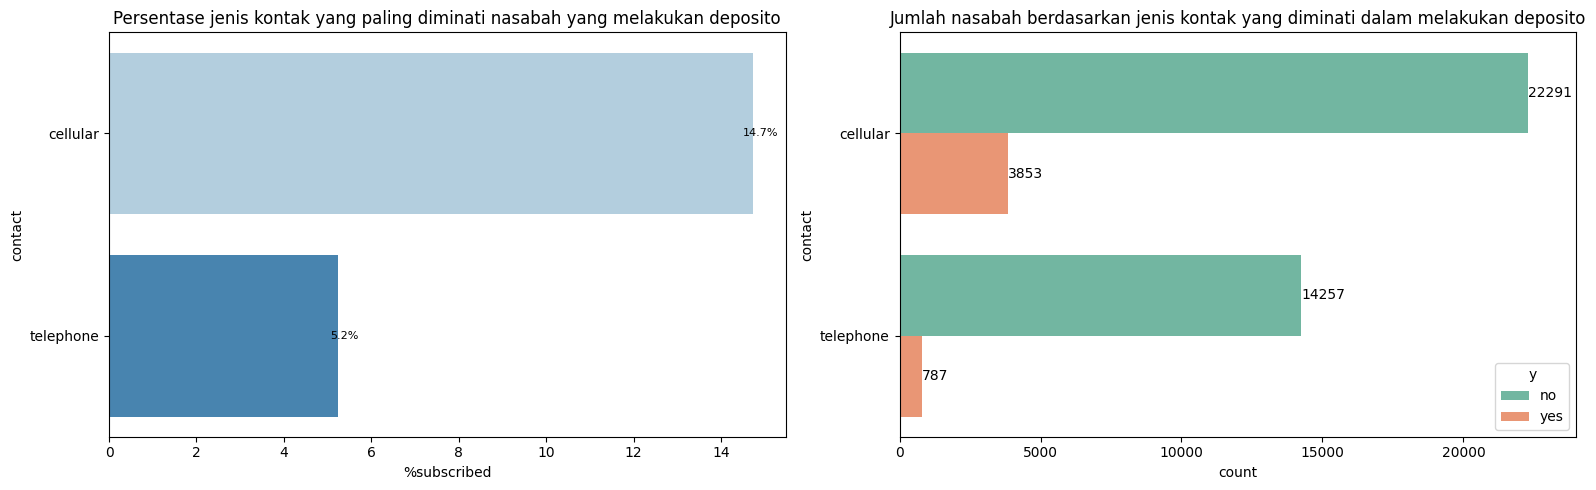

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

ax1 = sns.barplot(data=bank_contact, y='contact', x='%subscribed', hue='contact', ax=axes[0], palette='Blues', legend=False)
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate('{:.1f}%'.format(width), (p.get_x() + width, p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')
ax1.set_title('Persentase jenis kontak yang paling diminati nasabah yang melakukan deposito')

ax2 = sns.countplot(data=bank, y='contact', hue='y', order=bank_contact['contact'], ax=axes[1], palette='Set2')
ax2.set_title('Jumlah nasabah berdasarkan jenis kontak yang diminati dalam melakukan deposito')

for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xlim(0, 24000)

plt.tight_layout()
plt.show()

**Insight**

Presentase jenis kontak yang paling diminati nasabah dalam melakukan deposito adalah `Cellular` sekitar 14.7%, dibandingkan dengan jenis kontak `Telephone`. Hal ini menunjukkan bahwa komunikasi melalui ponsel menawarkan kemudahan, kecepatan, dan aksesibilitas yang lebih besar dibandingkan dengan menggunakan telepon rumah. Nasabah cenderung lebih responsif terhadap pesan dan panggilan yang diterima melalui ponsel mereka yang mungkin menjadi alasan mengapa mereka lebih suka kontak melalui ponsel. Oleh karena itu, strategi pemasaran sebaiknya memprioritaskan kontak melalui ponsel (Cellular) karena memiliki tingkat langganan yang lebih tinggi. 

**Berapa lama durasi rata-rata panggilan untuk nasabah yang berlangganan deposito berjangka?**

In [25]:
bank_duration = bank.groupby(['y'])['duration'].mean().reset_index()
bank_duration['description'] = bank_duration['duration'].apply(lambda x: f"{x:.2f} detik")
bank_duration

,y,duration,description
0,no,220.844807,220.84 detik
1,yes,553.191164,553.19 detik


**Insight**

Durasi percakapan (duration) menunjukkan waktu yang dihabiskan agen untuk berkomunikasi dengan nasabah. Data menunjukkan bahwa nasabah yang berlangganan deposito berjangka cenderung memiliki durasi percakapan yang lebih lama dibandingkan dengan yang tidak berlangganan. Durasi percakapan yang lebih lama mungkin mencerminkan upaya yang lebih besar dari agen untuk memberikan informasi yang lebih detail dan meyakinkan nasabah untuk berlangganan deposito berjangka.

**Jenis komunikasi mana yang memiliki rata-rata durasi kontak tertinggi dalam upaya berlangganan deposito berjangka?**

In [27]:
bank_duration_byContact = bank.groupby(['contact', 'y'])['duration'].mean().reset_index()
bank_duration_byContact = bank_duration_byContact.sort_values(by='duration', ascending=False)
bank_duration_byContact

,contact,y,duration
3,telephone,yes,732.939009
1,cellular,yes,516.476512
2,telephone,no,222.469524
0,cellular,no,219.805661


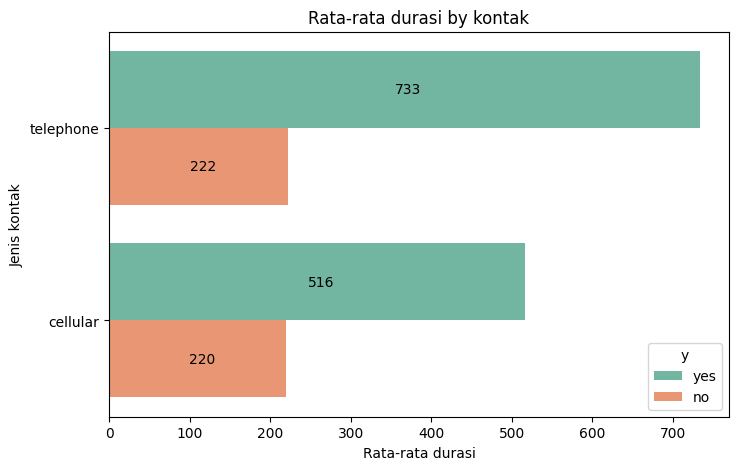

In [28]:
plt.figure(figsize=(8, 5))
fig = sns.barplot(data=bank_duration_byContact, y='contact', x='duration', hue='y', palette='Set2')

label0 = ['{:.0f}'.format(x) for x in fig.containers[0].datavalues]
label1 = ['{:.0f}'.format(x) for x in fig.containers[1].datavalues]
fig.bar_label(fig.containers[0], labels=label0, padding=3, label_type='center')
fig.bar_label(fig.containers[1], labels=label1, padding=3, label_type='center')

plt.xlabel('Rata-rata durasi')
plt.ylabel('Jenis kontak')
plt.title('Rata-rata durasi by kontak')
plt.show()


**Insight**

Nasabah yang dihubungi melalui telepon memiliki rata-rata durasi lebih lama dibandingkan dengan nasabah yang dihubungi melalui ponsel. Nasabah yang dihubungi melalui telepon memiliki rata-rata durasi 732.94 detik jika mereka menyetujui deposito, dan 222.47 detik jika mereka tidak menyetujui. Sementara itu, nasabah yang dihubungi melalui ponsel memiliki rata-rata durasi 516.48 detik jika mereka menyetujui deposito, dan 219.81 detik jika mereka tidak menyetujui.

Dengan demikian, penggunaan ponsel untuk menghubungi nasabah dapat meningkatkan produktivitas dan efisiensi tim marketing karena durasi kontak yang lebih singkat. Hal ini memungkinkan tim untuk menghubungi lebih banyak nasabah dalam waktu yang sama dibandingkan dengan menggunakan telepon. Hal ini memungkinkan tim untuk menghubungi lebih banyak nasabah dalam waktu yang sama dibandingkan dengan menggunakan telepon.

#### **3. Waktu Pemasaran Yang Tepat:**

**Pada bulan apa kampanye pemasaran paling berhasil dalam mendapatkan nasabah yang berlangganan deposito?**

In [29]:
bank_month = bank.groupby(['month', 'y']).size().unstack().reset_index()
bank_month['total'] = bank_month['yes'] + bank_month['no']
bank_month['%subscribed'] = (bank_month['yes'] / bank_month['total'] * 100).round(2)
bank_month = bank_month.sort_values(by='%subscribed', ascending=False)
bank_month

y,month,no,yes,total,%subscribed
5,mar,270,276,546,50.55
2,dec,93,89,182,48.90
9,sep,314,256,570,44.91
8,oct,403,315,718,43.87
0,apr,2093,539,2632,20.48
1,aug,5523,655,6178,10.60
4,jun,4759,559,5318,10.51
7,nov,3685,416,4101,10.14
3,jul,6525,649,7174,9.05
6,may,12883,886,13769,6.43


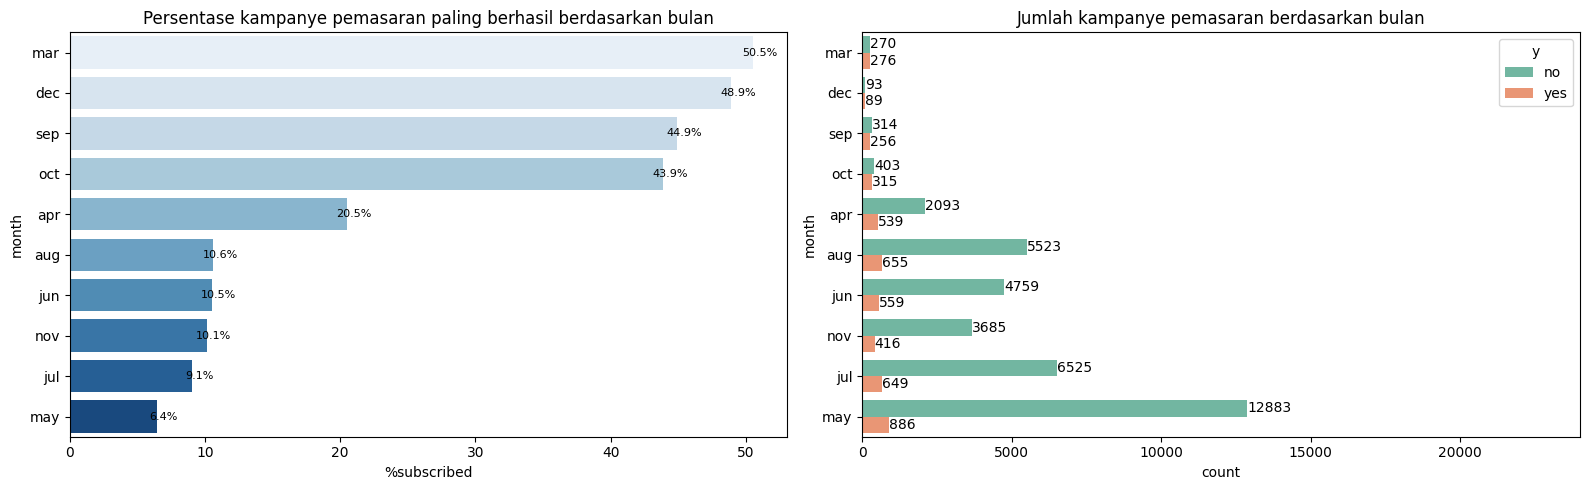

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

ax1 = sns.barplot(data=bank_month, y='month', x='%subscribed', hue='month', ax=axes[0], palette='Blues', legend=False)
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate('{:.1f}%'.format(width), (p.get_x() + width, p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')
ax1.set_title('Persentase kampanye pemasaran paling berhasil berdasarkan bulan')

ax2 = sns.countplot(data=bank, y='month', hue='y', order=bank_month['month'], ax=axes[1], palette='Set2')
ax2.set_title('Jumlah kampanye pemasaran berdasarkan bulan')

for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xlim(0, 24000)

plt.tight_layout()
plt.show()

**Insight**

Bulan-bulan dengan tingkat langganan deposito berjangka tertinggi adalah Maret (50.55%), Desember (48.90%), September (44.91%), dan Oktober (43.87%). Sementara itu, bulan-bulan dengan tingkat langganan terendah adalah Mei (6.43%), Juli (9.05%), November (10.14%), dan Juni (10.51%). Fokuskan upaya pemasaran pada bulan-bulan dengan tingkat langganan tertinggi (Maret, Desember, September, Oktober) untuk mengoptimalkan hasil kampanye.

**Pada hari apa kampanye pemasaran paling berhasil dalam mendapatkan nasabah yang berlangganan deposito berjangka?**

In [31]:
bank_day = bank.groupby(['day_of_week', 'y']).size().unstack().reset_index()
bank_day['total'] = bank_day['yes'] + bank_day['no']
bank_day['%subscribed'] = (bank_day['yes'] / bank_day['total'] * 100).round(2)
bank_day = bank_day.sort_values(by='%subscribed', ascending=False)
bank_day

y,day_of_week,no,yes,total,%subscribed
2,thu,7578,1045,8623,12.12
3,tue,7137,953,8090,11.78
4,wed,7185,949,8134,11.67
0,fri,6981,846,7827,10.81
1,mon,7667,847,8514,9.95


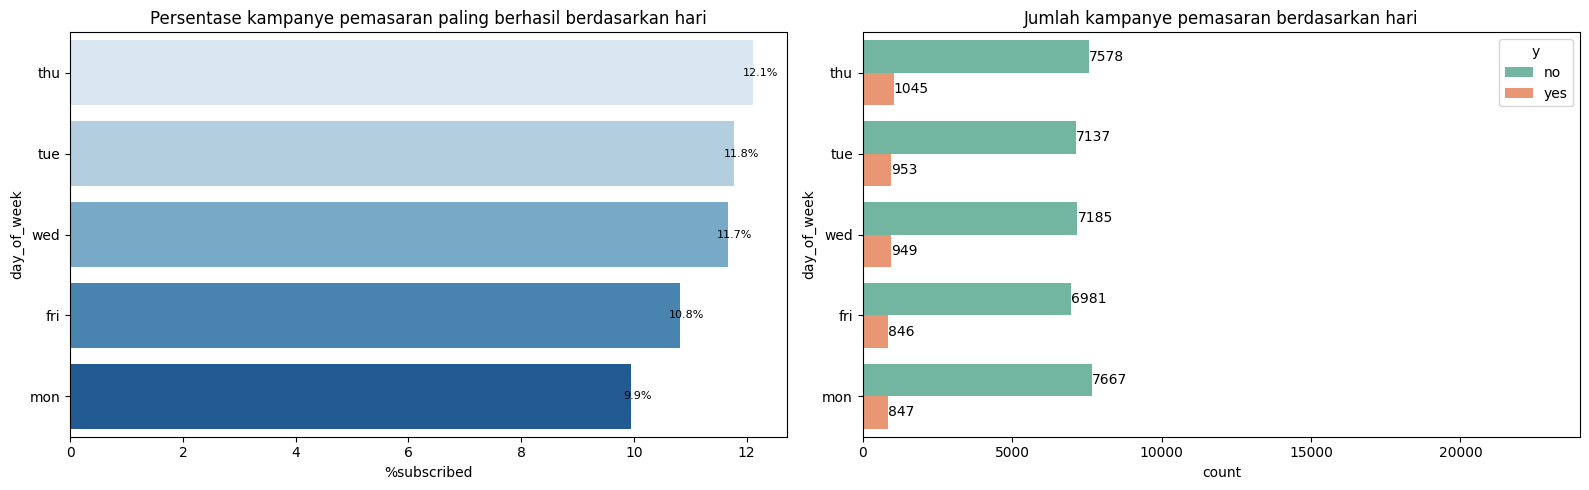

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

ax1 = sns.barplot(data=bank_day, y='day_of_week', x='%subscribed', hue='day_of_week', ax=axes[0], palette='Blues', legend=False)
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate('{:.1f}%'.format(width), (p.get_x() + width, p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')
ax1.set_title('Persentase kampanye pemasaran paling berhasil berdasarkan hari')

ax2 = sns.countplot(data=bank, y='day_of_week', hue='y', order=bank_day['day_of_week'], ax=axes[1], palette='Set2')
ax2.set_title('Jumlah kampanye pemasaran berdasarkan hari')

for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xlim(0, 24000)

plt.tight_layout()
plt.show()

**Insight**

Hari-hari dengan tingkat langganan deposito tertinggi adalah Kamis (12.12%), Selasa (11.78%), dan Rabu (11.67%), sedangkan hari dengan tingkat langganan terendah adalah Senin (9.95%) dan Jumat (10.81%).

Oleh karena itu strategi pemasaran sebaiknya mempertimbangkan untuk melakukan kontak pada hari-hari yang optimal (Kamis, Selasa, Rabu) dan pastikan interaksi memiliki durasi yang memadai untuk memberikan informasi yang cukup dan meyakinkan.

#### **4. Detail Kampanye:**

**Berapa rata-rata jumlah kontak yang dilakukan selama kampanye untuk nasabah yang berlangganan deposito?**

In [33]:
bank_campaign = bank.groupby(['y'])['campaign'].mean().reset_index()
bank_campaign['description'] = bank_campaign['campaign'].apply(lambda x: f"{x:.2f} kontak")
bank_campaign

,y,campaign,description
0,no,2.633085,2.63 kontak
1,yes,2.051724,2.05 kontak


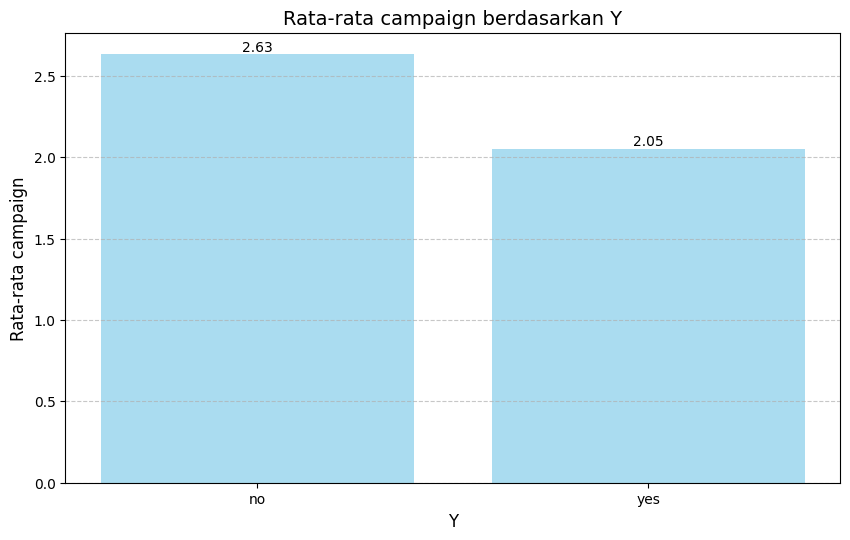

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(bank_campaign['y'], bank_campaign['campaign'], color='skyblue', label='Campaign', alpha=0.7)
plt.xlabel('Y', fontsize=12)
plt.ylabel('Rata-rata campaign', fontsize=12)
plt.title('Rata-rata campaign berdasarkan Y', fontsize=14)  
for i, v in enumerate(bank_campaign['campaign']):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)  

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.subplots_adjust(bottom=0.15, top=0.9)  # Menambahkan ruang di antara sumbu x dan label y
plt.show()


**Insight**

Nasabah yang melakukan deposito memiliki rata-rata jumlah kontak kampanye sebesar 2.05, sedangkan yang tidak berlangganan sebesar 2.63.  Oleh karena itu strategi pemasaran yang dilakukan adalah dengan Mengurangi frekuensi kontak. Hal ini dapat menunjukkan tingkat kepuasan atau pemahaman produk yang lebih tinggi. Fokuskan kontak pada memberikan informasi berkualitas tinggi daripada kuantitas, misalnya melalui konsultasi mendalam atau webinar.


**Berapa hari rata-rata berlalu sejak terakhir kali nasabah dihubungi dari kampanye sebelumnya untuk nasabah yang berlangganan deposito?**

In [35]:
bank_pdays = bank.groupby('y')['pdays'].mean().reset_index()
bank_pdays['description'] = bank_pdays['pdays'].apply(lambda x: f"{x:.2f} hari")
bank_pdays

,y,pdays,description
0,no,984.113878,984.11 hari
1,yes,792.035560,792.04 hari


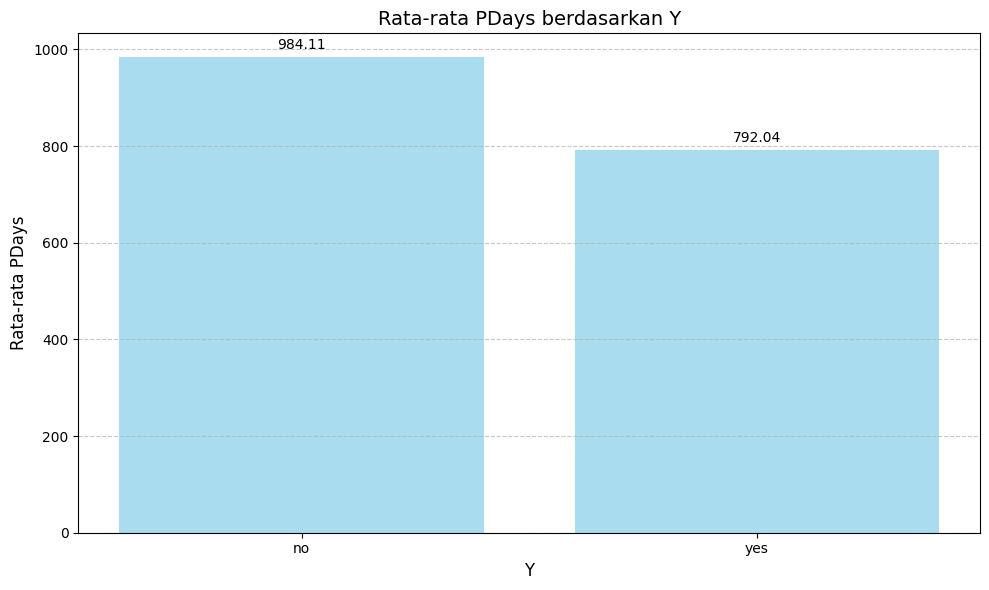

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(bank_pdays['y'], bank_pdays['pdays'], color='skyblue', label='Pdays', alpha=0.7)
plt.xlabel('Y', fontsize=12)
plt.ylabel('Rata-rata PDays', fontsize=12)
plt.title('Rata-rata PDays berdasarkan Y', fontsize=14)  
for i, v in enumerate(bank_pdays['pdays']):
    plt.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom', fontsize=10)  

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

**Insight**

Nasabah yang melakukan deposito memiliki rata-rata jumlah hari sejak kontak terakhir sebesar 792.04 hari, sedangkan yang tidak berlangganan sebesar 984.11 hari.
Oleh karena itu strategi pemasaran yang dilakukan adalah dengan menargetkan nasabah dengan lebih sering menghubungi mereka dalam waktu yang lebih singkat sehingga dapat meningkatkan peluang mereka untuk berlangganan. Pertahankan interval komunikasi yang lebih pendek untuk nasabah yang menunjukkan minat atau respons positif sebelumnya.

**Bagaimana hasil kampanye sebelumnya mempengaruhi keputusan untuk berlangganan deposito?**

In [37]:
bank_previous_campaign = bank.groupby(['poutcome', 'y']).size().unstack().reset_index()
bank_previous_campaign['total'] = bank_previous_campaign['yes'] + bank_previous_campaign['no']
bank_previous_campaign['%subscribed'] = (bank_previous_campaign['yes'] / bank_previous_campaign['total'] * 100).round(2)
bank_previous_campaign = bank_previous_campaign.sort_values(by='%subscribed', ascending=False)
bank_previous_campaign

y,poutcome,no,yes,total,%subscribed
2,success,479,894,1373,65.11
0,failure,3647,605,4252,14.23
1,nonexistent,32422,3141,35563,8.83


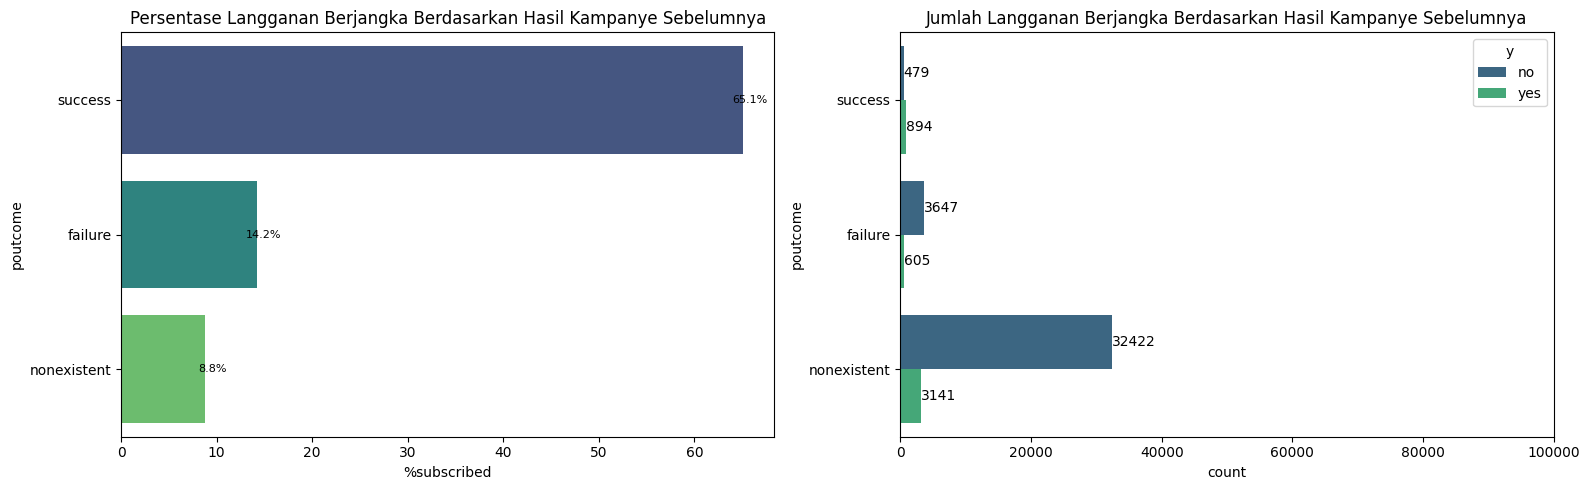

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

ax1 = sns.barplot(data=bank_previous_campaign, y='poutcome', x='%subscribed', hue='poutcome', ax=axes[0], palette='viridis', dodge=False)
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate('{:.1f}%'.format(width), (p.get_x() + width, p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')
ax1.set_title('Persentase Langganan Berjangka Berdasarkan Hasil Kampanye Sebelumnya')

ax2 = sns.countplot(data=bank, y='poutcome', hue='y', order=bank_previous_campaign['poutcome'], ax=axes[1], palette='viridis')
ax2.set_title('Jumlah Langganan Berjangka Berdasarkan Hasil Kampanye Sebelumnya')

for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xlim(0, 100000)

plt.tight_layout()
plt.show()


**Insight:**

Tingkat nasabah yang melakukan deposito jauh lebih tinggi pada nasabah yang berhasil dihubungi sebelumnya (65.11%) dibandingkan dengan nasabah yang gagal dihubungi (14.23%) atau tidak pernah dihubungi (8.83%).

Sehingga Tim pemasaran harus Fokus pada nasabah dengan hasil kontak sebelumnya yang sukses. Alokasikan lebih banyak sumber daya untuk menghubungi kembali kelompok ini, dengan penawaran khusus atau program loyalitas untuk meningkatkan tingkat konversi.

#### **5. Indikator Ekonomi:**

**Bagaimana tingkat pengangguran (emp.var.rate) mempengaruhi keputusan untuk berlangganan deposito?**

In [39]:
avg_emp_var_rate = bank.groupby('y')['emp.var.rate'].mean().reset_index()
avg_emp_var_rate['description'] = avg_emp_var_rate['emp.var.rate'].apply(lambda x: f"{x:.2f}")
avg_emp_var_rate

,y,emp.var.rate,description
0,no,0.248875,0.25
1,yes,-1.233448,-1.23


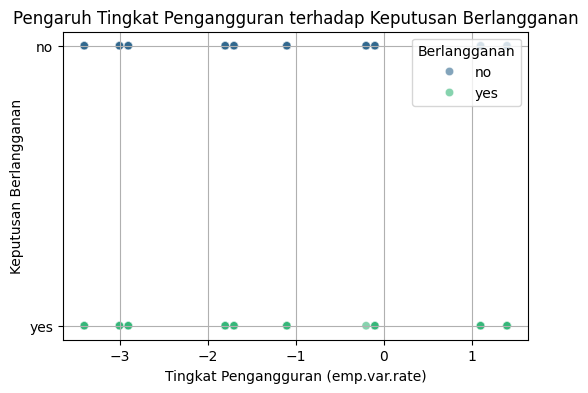

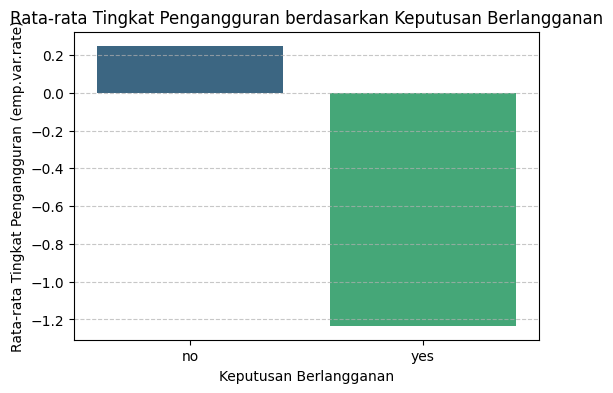

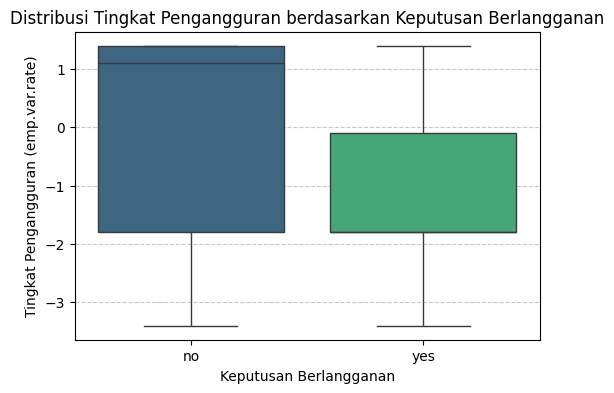

In [40]:

# Scatter plot untuk melihat hubungan antara tingkat pengangguran dan keputusan berlangganan
plt.figure(figsize=(6, 4))
sns.scatterplot(data=bank, x='emp.var.rate', y='y', hue='y', palette='viridis', alpha=0.6)
plt.xlabel('Tingkat Pengangguran (emp.var.rate)')
plt.ylabel('Keputusan Berlangganan')
plt.title('Pengaruh Tingkat Pengangguran terhadap Keputusan Berlangganan')
plt.legend(title='Berlangganan', loc='upper right')
plt.grid(True)
plt.show()

# Bar plot untuk melihat rata-rata tingkat pengangguran berdasarkan keputusan berlangganan
avg_emp_var_rate = bank.groupby('y')['emp.var.rate'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_emp_var_rate, x='y', y='emp.var.rate', palette='viridis')
plt.xlabel('Keputusan Berlangganan')
plt.ylabel('Rata-rata Tingkat Pengangguran (emp.var.rate)')
plt.title('Rata-rata Tingkat Pengangguran berdasarkan Keputusan Berlangganan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box plot untuk melihat distribusi tingkat pengangguran berdasarkan keputusan berlangganan
plt.figure(figsize=(6, 4))
sns.boxplot(data=bank, x='y', y='emp.var.rate', palette='viridis')
plt.xlabel('Keputusan Berlangganan')
plt.ylabel('Tingkat Pengangguran (emp.var.rate)')
plt.title('Distribusi Tingkat Pengangguran berdasarkan Keputusan Berlangganan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**

Nasabah yang tidak melakukan deposito memiliki rata-rata tingkat variasi ketenagakerjaan sebesar 0.25 dan nasabah yang melakukan deposito memiliki rata-rata tingkat variasi ketenagakerjaan sebesar -1.23. Nasabah cenderung berlangganan deposito berjangka ketika situasi ketenagakerjaan memburuk (emp.var.rate negatif).

Oleh karena itu Pantau kondisi pasar tenaga kerja dan tingkatkan kampanye pemasaran saat tingkat variasi ketenagakerjaan menurun. Promosikan keamanan dan stabilitas deposito berjangka sebagai investasi yang aman selama ketidakpastian ekonomi.


**Bagaimana indeks kepercayaan konsumen (cons.conf.idx) mempengaruhi keputusan untuk berlangganan deposito?**

In [41]:
bank_conf_idx = bank.groupby('y')['cons.conf.idx'].mean().reset_index()
bank_conf_idx['description'] = bank_conf_idx['cons.conf.idx'].apply(lambda x: f"{x:.2f}")
bank_conf_idx

,y,cons.conf.idx,description
0,no,-40.593097,-40.59
1,yes,-39.789784,-39.79


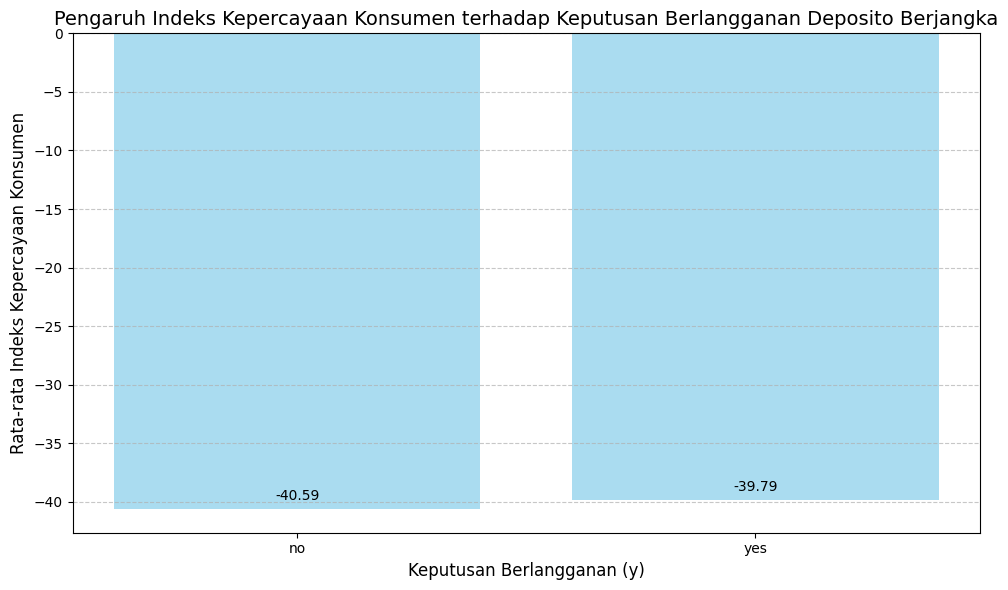

In [42]:
y_values = bank_conf_idx['y']
cons_conf_idx_values = bank_conf_idx['cons.conf.idx']

plt.figure(figsize=(10, 6))
plt.bar(y_values, cons_conf_idx_values, color='skyblue', alpha=0.7)
plt.xlabel('Keputusan Berlangganan (y)', fontsize=12)
plt.ylabel('Rata-rata Indeks Kepercayaan Konsumen', fontsize=12)
plt.title('Pengaruh Indeks Kepercayaan Konsumen terhadap Keputusan Berlangganan Deposito Berjangka', fontsize=14)

for i, v in enumerate(cons_conf_idx_values):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Insight**

Nasabah yang berlangganan memiliki indeks kepercayaan konsumen yang lebih tinggi (-39.79) dibandingkan yang tidak berlangganan (-40.59). Sehingga Meningkatkan kepercayaan konsumen dapat meningkatkan minat berlangganan. Implementasikan strategi yang membangun kepercayaan, seperti testimoni nasabah, studi kasus sukses, dan transparansi informasi produk.

**Bagaimana tingkat suku bunga Euribor 3 bulan (euribor3m) mempengaruhi keputusan untuk berlangganan deposito?**

In [43]:
bank_euribor3m = bank.groupby('y')['euribor3m'].mean().reset_index()
bank_euribor3m['description'] = bank_euribor3m['euribor3m'].apply(lambda x: f"{x:.2f}")
bank_euribor3m

,y,euribor3m,description
0,no,3.811491,3.81
1,yes,2.123135,2.12


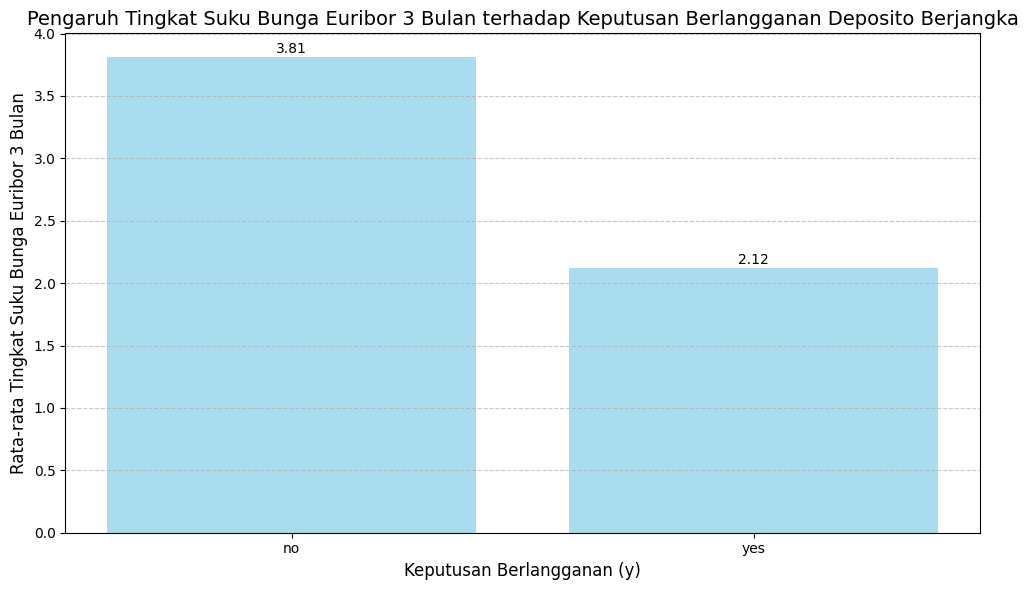

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(bank_euribor3m['y'], bank_euribor3m['euribor3m'], color='skyblue', alpha=0.7)
plt.xlabel('Keputusan Berlangganan (y)', fontsize=12)
plt.ylabel('Rata-rata Tingkat Suku Bunga Euribor 3 Bulan', fontsize=12)
plt.title('Pengaruh Tingkat Suku Bunga Euribor 3 Bulan terhadap Keputusan Berlangganan Deposito Berjangka', fontsize=14)

for i, v in enumerate(bank_euribor3m['euribor3m']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Insight:**

Nasabah yang melakukan deposito cenderung memanfaatkan kondisi suku bunga yang lebih rendah (2.12) dibandingkan dengan yang tidak berlangganan (3.81). Oleh karena itu strategi pemasaran dilakukan dengan mempromosikan produk deposito lebih agresif saat suku bunga rendah, menekankan keuntungan dari tingkat bunga yang menguntungkan untuk investasi mereka. Tawarkan penawaran bunga khusus atau kampanye promosi yang menarik saat suku bunga turun.

## **4. Preprocessing**

#### **Cleaning Data**

**Missing Value**

In [45]:
missing_info = pd.DataFrame({
    'Feature': bank.columns.values,
    'Null_value': [bank[col].isna().sum() for col in bank.columns],
    '%null_value': bank.isna().mean().values * 100,
})

missing_info

,Feature,Null_value,%null_value
0,age,0,0.0
1,ageGroup,0,0.0
2,job,0,0.0
3,marital,0,0.0
4,education,0,0.0
5,default,0,0.0
6,housing,0,0.0
7,loan,0,0.0
8,contact,0,0.0
9,month,0,0.0


**Duplicate**

In [46]:
duplicates = bank.duplicated().sum()
print(f'Number of duplicates = {duplicates}')
print(f'Percent of duplicates = {duplicates / len(bank) * 100:.2f}%')

Number of duplicates = 12
Percent of duplicates = 0.03%


In [47]:
bank[bank.duplicated()]

,age,ageGroup,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,adult,blue-collar,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,adult,retired,married,unknown,no,no,no,telephone,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,young adult,technician,single,professional.course,no,no,no,cellular,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,middle-aged,technician,divorced,high.school,no,yes,no,cellular,jul,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,adult,technician,single,professional.course,no,yes,no,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,middle-aged,services,married,high.school,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,adult,technician,married,professional.course,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,adult,admin.,married,university.degree,no,no,no,cellular,nov,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,young adult,services,single,high.school,no,yes,no,cellular,apr,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,adult,admin.,married,university.degree,no,yes,no,cellular,may,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Dataset memiliki duplikat sebanyak 0.03%. Hal ini menandakan bahwa ada beberapa baris data yang identik dalam dataset.

Namun, pada contoh data yang diberikan tidak ada baris yang sepenuhnya duplikat jika dilihat dari keseluruhan fitur, terutama fitur `age` yang tidak memiliki kesamaan sama sekali. Oleh karena itu, data duplikat tidak perlu dihapus, karena tidak ada baris yang benar-benar identik di seluruh kolom.

**Outliers**

In [48]:
numerik = bank.select_dtypes(include='number')
numerik

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


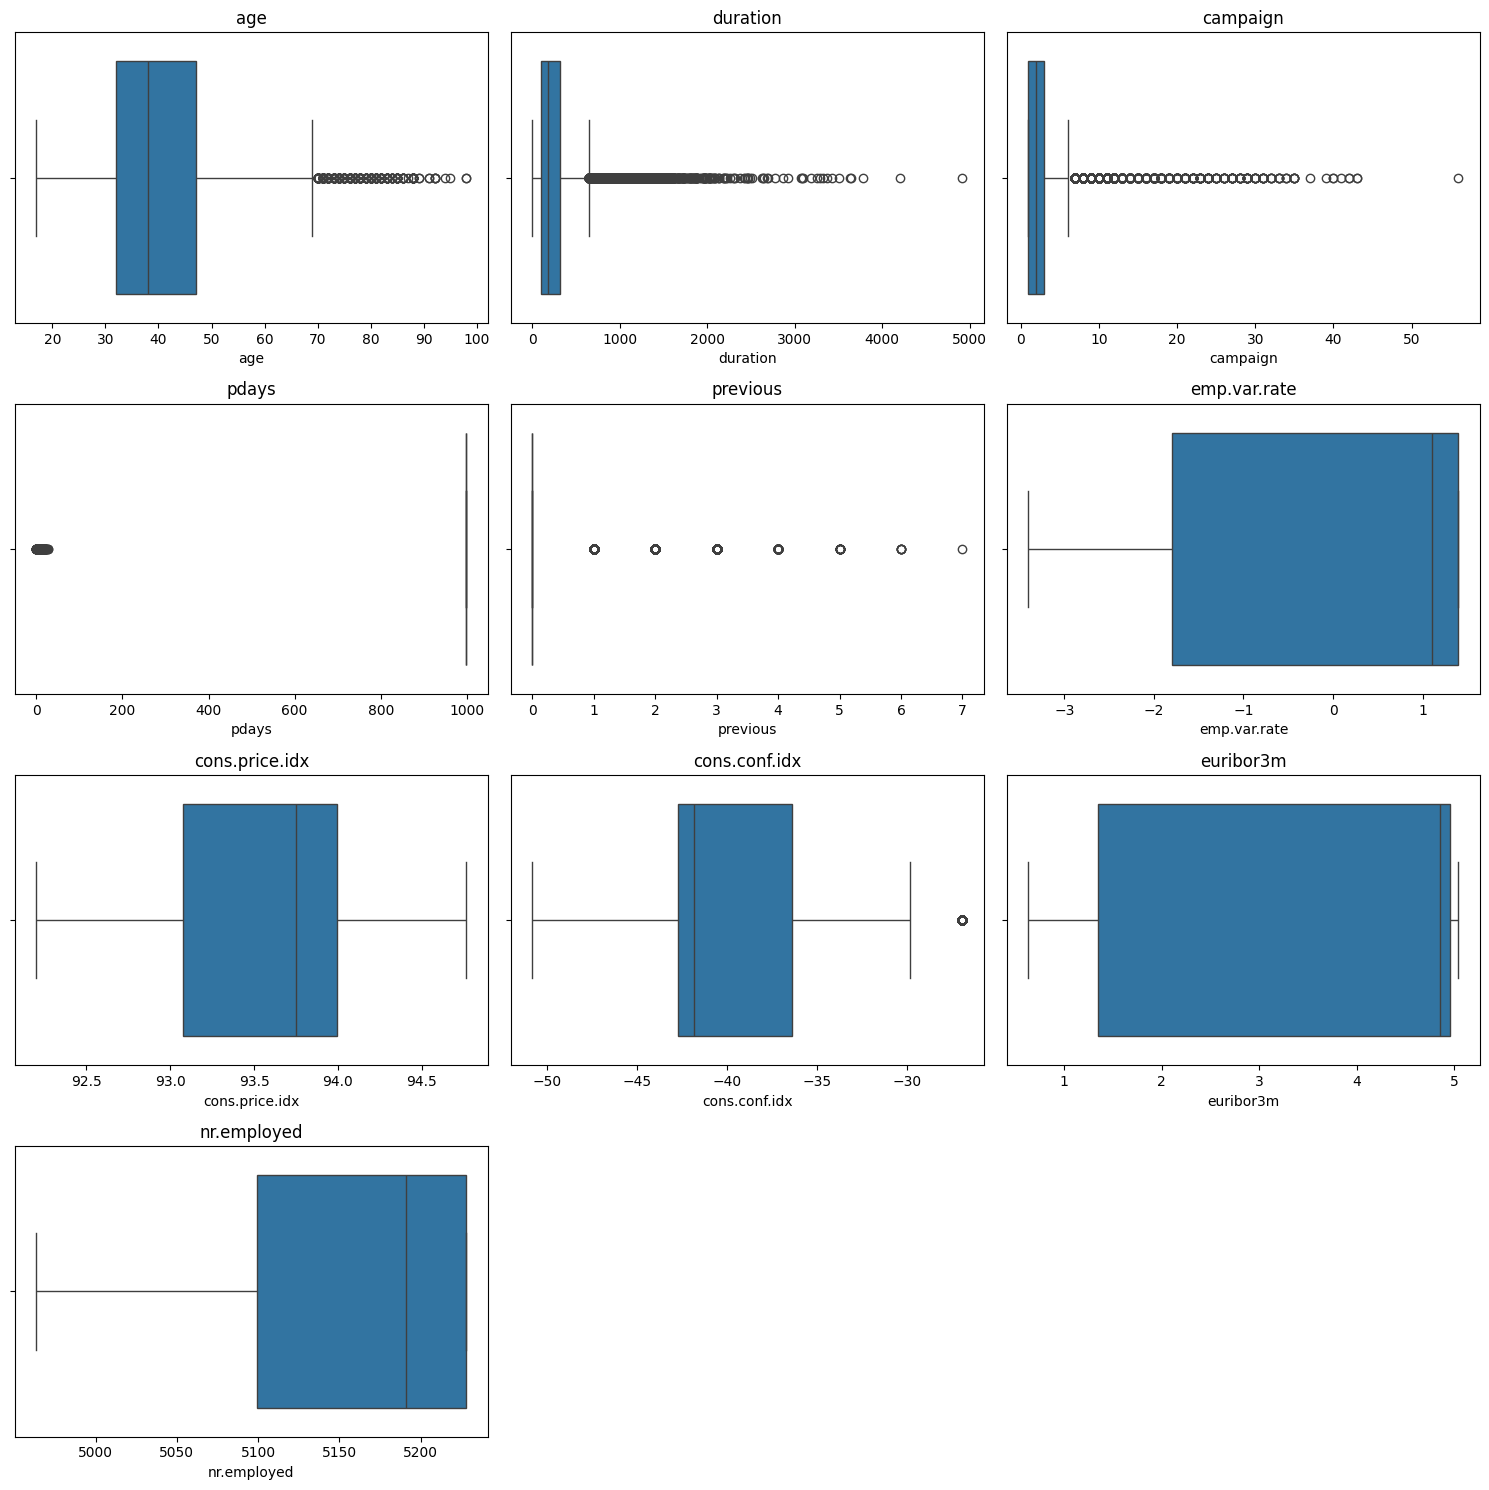

In [49]:
fig = plt.figure(figsize=(15, 15))

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(4, 3, count)
    sns.boxplot(x=numerik[kolom]) 
    fig.tight_layout()
    plt.title(f'{kolom}')

plt.show()

Berdasarkan grafik di atas terlihat bahwa beberapa fitur memiliki outliers antara lain `age`, `duration`, `campaign`, `pdays`, `previous` dan `cons.conf.idx`.

**Fill Missing Values**

In [50]:
bank = bank.replace('unknown',np.nan)

In [51]:
bank.isna().sum()[bank.isna().sum()>0]

job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64

Job

In [52]:
# Membuat tabel silang (contingency table)
contingency_table = pd.crosstab(bank['education'], bank['job'])

# Melakukan chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Menafsirkan hasil
alpha = 0.05
if p < alpha:
    print("Terdapat hubungan yang signifikan antara tingkat pendidikan dan jenis pekerjaan.")
else:
    print("Tidak terdapat hubungan yang signifikan antara tingkat pendidikan dan jenis pekerjaan.")

Chi-square Statistic: 35559.95706757686
P-value: 0.0
Degrees of Freedom: 60
Expected Frequencies:
[[1.06865994e+03 9.24428142e+02 6.86072750e+02 4.01180804e+02
  2.94241276e+02 1.70388914e+02 1.46963065e+02 1.46227724e+02
  1.06939528e+02 1.04523409e+02 7.43744460e+01]
 [5.88229405e+02 5.08838963e+02 3.77639462e+02 2.20824545e+02
  1.61961129e+02 9.37882725e+01 8.08938306e+01 8.04890723e+01
  5.88634164e+01 5.75334964e+01 4.09384075e+01]
 [1.55841923e+03 1.34808701e+03 1.00049503e+03 5.85039126e+02
  4.29089969e+02 2.48476947e+02 2.14315197e+02 2.13242855e+02
  1.55949157e+02 1.52425748e+02 1.08459728e+02]
 [2.45605212e+03 2.12457079e+03 1.57676952e+03 9.22015436e+02
  6.76241225e+02 3.91597025e+02 3.37758470e+02 3.36068470e+02
  2.45774212e+02 2.40221356e+02 1.70931377e+02]
 [4.66437414e+00 4.03484640e+00 2.99449794e+00 1.75103164e+00
  1.28427327e+00 7.43695552e-01 6.41448877e-01 6.38239340e-01
  4.66758368e-01 4.56212746e-01 3.24621733e-01]
 [1.35551895e+03 1.17257120e+03 8.70234373

setelah dilakukan uji statistik 'job' memiliki hubungan yang signifikan antara (education) seseorang. Oleh karenanya kita akan meng-impute missing values pada 'job' berdasarkan pendidikan nasabah.

In [53]:
# Membuat salinan dari DataFrame
bank = bank.copy()

In [54]:
# Menentukan pekerjaan yang paling sering muncul di setiap jenjang pendidikan
modus = bank.groupby('education')['job'].agg(lambda x: x.mode().iloc[0])

# Menghasilkan DataFrame yang menyertakan jenjang pendidikan dan pekerjaan yang paling banyak muncul
modus = modus.reset_index()

# Menampilkan hasil
modus

,education,job
0,basic.4y,blue-collar
1,basic.6y,blue-collar
2,basic.9y,blue-collar
3,high.school,admin.
4,illiterate,blue-collar
5,professional.course,technician
6,university.degree,admin.


In [55]:
# Mengisi nilai NaN pada kolom 'job' berdasarkan modus yang dihitung
for pendidikan, pekerjaan in zip(modus['education'], modus['job']):
    bank.loc[(bank['education'] == pendidikan) & (bank['job'].isnull()), 'job'] = pekerjaan

In [56]:
bank.isna().sum()[bank.isna().sum()>0]

job           131
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64

Kita lihat masih ada 131 missing values pada kolom 'job' dikarenakan kolom 'education'-nya juga NaN. Oleh karenanya kita akan lanjut meng-impute 'job' berdasarkan kelompok usianya ('age group')

In [57]:
pd.crosstab(bank['ageGroup'], bank['job'])

job,admin.,blue-collar,technician,services,management,retired,entrepreneur,self-employed,housemaid,unemployed,student
ageGroup,,,,,,,,,,,
Elderly,110,49,51,8,58,785,17,21,67,10,0
adult,5738,5024,3933,2025,1488,54,765,709,445,526,135
middle-aged,2487,2789,1604,1021,1112,876,536,431,489,309,4
teenage,1,7,4,3,0,0,4,0,0,0,121
young adult,2168,1490,1163,912,266,5,134,260,59,169,615


In [58]:
# menampilkan pekerjaan yang paling banyak muncul di tiap kelompok usia
modus = bank.groupby('ageGroup')['job'].apply(pd.Series.mode).xs(0,level=1).to_frame().reset_index()
modus

,ageGroup,job
0,Elderly,retired
1,adult,admin.
2,middle-aged,blue-collar
3,teenage,student
4,young adult,admin.


In [59]:
age_group = list(modus['ageGroup'])
job = list(modus['job'])

for kelompok_usia, pekerjaan in zip(age_group, job) :
    bank.loc[(bank['ageGroup'] == kelompok_usia) & (bank['job'].isnull()), 'job'] = pekerjaan

In [60]:
bank.isna().sum()[bank.isna().sum()>0]

marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64

Education

Kita mengasumsikan 'education' seseorang dapat tergambar dari pekerjaan yang saat ini dimiliki oleh nasabah. Oleh karenanya kita akan meng-impute missing values pada 'education' berdasarkan jenis pekerjaan nasabah.

In [61]:
# menampilkan pendidikan yang paling banyak muncul di tiap jenis pekerjaan
modus = bank.groupby('job')['education'].apply(pd.Series.mode).xs(0,level=1).to_frame().reset_index()
modus

,job,education
0,admin.,university.degree
1,blue-collar,basic.9y
2,technician,professional.course
3,services,high.school
4,management,university.degree
5,retired,basic.4y
6,entrepreneur,university.degree
7,self-employed,university.degree
8,housemaid,basic.4y
9,unemployed,university.degree


In [62]:
education = list(modus['education'])
job = list(modus['job'])

for pendidikan, pekerjaan in zip(education, job) :
    bank.loc[(bank['job'] == pekerjaan) & (bank['education'].isnull()), 'education'] = pendidikan

In [63]:
bank.isna().sum()[bank.isna().sum()>0]

marital      80
default    8597
housing     990
loan        990
dtype: int64

Marital

Kita mengasumsikan status 'marital' nasabah dipengaruhi oleh usia (age group). Oleh karenanya kita akan meng-impute missing values pada 'marital' berdasarkan 'age group'.

In [64]:
pd.crosstab(bank['ageGroup'], bank['marital'])

marital,divorced,married,single
ageGroup,,,
Elderly,224,926,41
adult,2140,12835,5859
middle-aged,2019,8777,917
teenage,0,1,139
young adult,229,2389,4612


In [65]:
# menampilkan status 'marital' yang paling banyak muncul di tiap kelompok usia
modus = bank.groupby('ageGroup')['marital'].apply(pd.Series.mode).xs(0,level=1).to_frame().reset_index()
modus

,ageGroup,marital
0,Elderly,married
1,adult,married
2,middle-aged,married
3,teenage,single
4,young adult,single


In [66]:
marital = list(modus['marital'])
age_group = list(modus['ageGroup'])

for status, kelompok_umur in zip(marital, age_group) :
    bank.loc[(bank['ageGroup'] == kelompok_umur) & (bank['marital'].isnull()), 'marital'] = status

In [67]:
bank.isna().sum()[bank.isna().sum()>0]

default    8597
housing     990
loan        990
dtype: int64

Housing

In [68]:
pd.crosstab(bank['job'], bank['housing'])

housing,no,yes
job,,
admin.,4680,5625
blue-collar,4402,4798
technician,2987,3621
services,1818,2050
management,1363,1490
retired,788,905
entrepreneur,641,779
self-employed,641,740
housemaid,491,540


In [69]:
pd.crosstab(bank['marital'], bank['housing'])

housing,no,yes
marital,,
divorced,2092,2399
married,11426,12980
single,5104,6197


In [70]:
pd.crosstab(bank['ageGroup'], bank['housing'])

housing,no,yes
ageGroup,,
Elderly,521,643
adult,9448,10930
middle-aged,5330,6118
teenage,50,86
young adult,3273,3799


Kita dapati bahwa untuk setiap jenis pekerjaan, status pernikahan dan juga kelompok usia, mayoritas nasabah memiliki pinjaman KPR, oleh karenanya kita akan impute 'housing' dengan 'yes'.

In [71]:
bank['housing'].fillna('yes', inplace=True)

In [72]:
bank.isna().sum()[bank.isna().sum()>0]

default    8597
loan        990
dtype: int64

Loan

In [73]:
pd.crosstab(bank['job'], bank['loan'])

loan,no,yes
job,,
admin.,8573,1732
blue-collar,7803,1397
technician,5617,991
services,3267,601
management,2414,439
retired,1451,242
entrepreneur,1214,206
self-employed,1186,195
housemaid,877,154


In [74]:
pd.crosstab(bank['marital'], bank['loan'])

loan,no,yes
marital,,
divorced,3816,675
married,20622,3784
single,9512,1789


In [75]:
pd.crosstab(bank['ageGroup'], bank['loan'])

loan,no,yes
ageGroup,,
Elderly,1003,161
adult,17220,3158
middle-aged,9665,1783
teenage,113,23
young adult,5949,1123


Kita dapati bahwa untuk setiap jenis pekerjaan, status pernikahan dan juga kelompok usia, mayoritas nasabah tidak memiliki pinjaman personal, oleh karenanya kita akan impute 'loan' dengan 'no'.

In [76]:
bank['loan'].fillna('no', inplace=True)

In [77]:
bank.isna().sum()[bank.isna().sum()>0]

default    8597
dtype: int64

**Handling Outliers**

In [78]:
numerical_cols = list(set(bank.columns)-set(categorical_cols))

In [79]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_cols: 
    IQR = bank[feature].quantile(0.75) - bank[feature].quantile(0.25)
    lower_fence = bank[feature].quantile(0.25) - 1.5*IQR
    upper_fence = bank[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(bank[bank[feature]<lower_fence]))
    number_inside.append(len(bank[(bank[feature]>=lower_fence) & (bank[feature]<=upper_fence)]))
    number_upper.append(len(bank[bank[feature]>upper_fence]))
    percentage_outlier.append(round((len(bank[bank[feature]<lower_fence]) + len(bank[bank[feature]>upper_fence])) / len(bank)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_cols,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,campaign,-2.0000,6.0000,0,38782,2406,5.84
1,cons.conf.idx,-52.1500,-26.9500,0,40741,447,1.09
2,emp.var.rate,-6.6000,6.2000,0,41188,0,0.00
3,nr.employed,4905.6000,5421.6000,0,41188,0,0.00
4,euribor3m,-4.0815,10.3865,0,41188,0,0.00
5,cons.price.idx,91.6965,95.3725,0,41188,0,0.00
6,age,9.5000,69.5000,0,40719,469,1.14
7,pdays,999.0000,999.0000,1515,39673,0,3.68
8,duration,-223.5000,644.5000,0,38225,2963,7.19
9,previous,0.0000,0.0000,0,35563,5625,13.66


- Fitur `emp.var.rate`, `euribor3m`, `cons.price.idx`, dan `nr.employed` tidak memiliki outlier.
- Fitur `campaign`, `cons.conf.idx`, `previous`, `age`, `duration`, dan `pdays` memiliki sejumlah outlier yang perlu diperhatikan.
- Fitur `previous` memiliki persentase outlier tertinggi (13.66%), menunjukkan banyak data yang berbeda dari mayoritas lainnya dalam hal panggilan kampanye sebelumnya.
- Fitur `duration` dan `campaign` juga menunjukkan adanya outlier yang cukup signifikan dengan persentase 7.19% dan 5.84% masing-masing.

Namun, outliers ini tidak akan kita drop karena bisa jadi mengandung informasi penting untuk machine learning yang akan kita buat. Perhatikan bahwa fitur `age`, meskipun memiliki outliers menunjukkan bahwa rentang usia dalam dataset ini cukup bervariasi.

#### **Imbalance Data**

In [80]:
bank.drop(columns=['default'],inplace=True)

In [81]:
bank.drop(columns=['ageGroup'],inplace=True)

In [82]:
# Percentage of Target Columns
campaign_percentage = 100 * bank['y'].value_counts() / len(bank['y'])

print(campaign_percentage)

y
no     88.734583
yes    11.265417
Name: count, dtype: float64


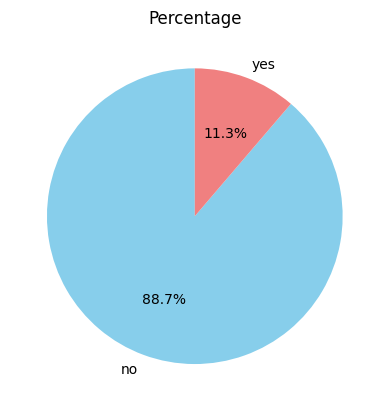

In [83]:
# Pie chart plot
plt.pie(campaign_percentage, labels=campaign_percentage.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage')
plt.show()

Kita dapat melihat bahwa dataset tidak seimbang (moderate imbalance) karena proporsi kelas minoritas sebesar 11.3%. Untuk mensiasati hal tersebut nantinya kita dapat menguji apakah modelling perlu menerapkan metode resampling agar data kita memiliki distribusi kelas yang lebih seimbang atau tidak.

> Merubah values pada kolom target

In [84]:
# Mengubah nilai 'yes' menjadi 1 dan nilai 'no' menjadi 0
bank['y'] = bank['y'].replace({'yes': 1, 'no': 0})

#### **Feature Engineering**

**Define X dan Y**

In [85]:
X = bank.drop(columns=['y'])  # Fitur
y = bank['y']  # Target

**Spliting Data**

In [86]:
# Split data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    stratify= y,
    test_size=0.2, 
    random_state=42)

**Encoding**

In [87]:
bank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [88]:
# mapping untuk ordinal encoder

ordinal_mapping = [
    {'col':'education', 'mapping':{None:0, 'illiterate':1, 'basic.4y':2, 'basic.6y':3, 'basic.9y':4, 'high.school':5,  'professional.course':6, 'university.degree':7}},
    {'col':'poutcome', 'mapping':{None:0, 'success':2, 'failure':1, 'nonexistent':0}}
]

In [89]:
import category_encoders as ce
robustCols = ['age', 'campaign', 'previous']
oneHot = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
standard_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Preprocessor dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ce.OrdinalEncoder(cols=['education','poutcome'], mapping=ordinal_mapping), ['education', 'poutcome']),
        ('robust', RobustScaler(), robustCols),
        ('onehot', OneHotEncoder(drop='first'), oneHot),  # Gunakan sparse_output=False
        ('standard', StandardScaler(), standard_cols)
    ],remainder='passthrough'
)


In [90]:
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(cols=['education', 'poutcome'],
                                                mapping=[{'col': 'education',
                                                          'data_type': dtype('O'),
                                                          'mapping': None                   0
illiterate             1
basic.4y               2
basic.6y               3
basic.9y               4
high.school            5
professional.course    6
university.degree      7
dtype: int64},
                                                         {'col': 'poutcome',
                                                          'data_type': dtype('O'),
                                                          'mapping': None           0
success        2
failure        1
nonexistent    0
dtype: int64}]),
                                 ['education', 'poutcome']),
                                ('robust', RobustScaler(),
                                 ['age', 'campaign', 'previous']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['job', 'marital', 'education', 'housing',
                                  'loan', 'contact', 'month', 'day_of_week',
                                  'poutcome']),
                                ('standard', StandardScaler(),
                                 ['emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m',
                                  'nr.employed'])])

## **5. Modeling**

#### **Pipeline Model**

Kita akan membuat pipeline untuk setiap model dengan tujuan memastikan setiap langkah dalam proses machine learning diterapkan secara konsisten setiap kali model dijalankan, sehingga hasil yang diperoleh dapat direplikasi. Algoritma yang  kami gunakan yaitu LogisticRegression, KNN,RandomForest, SGD, Adaboost & Xgboost.

In [91]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier

# Definisikan pipeline untuk setiap model
pipeline_log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

pipeline_random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Definisikan model Stochastic Gradient Descent (SGD)
pipeline_sgd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier())
])

# Definisikan model AdaBoost
pipeline_ada = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())
])


**List pipeline untuk iterasi**

List pipeline ini digunakan untuk iterasi melalui beberapa model machine learning yang berbeda dan melakukan operasi yang sama pada setiap model. Ini memungkinkan kita untuk mengotomatisasi proses training, testing, dan evaluasi model dengan cara yang konsisten dan efisien. Dengan list ini kita dapat melakukan operasi yang sama pada setiap model dalam loop, seperti fit, predict, dan evaluasi hasilnya. 

In [92]:
# List pipeline untuk iterasi
pipelines = [
    ('Logreg', pipeline_log_reg),
    ('KNN', pipeline_knn),
    ('RF', pipeline_random_forest),
    ('XGBoost', pipeline_xgb),
    ('SGD', pipeline_sgd),
    ('AdaBoost', pipeline_ada)
]

In [93]:
# Fit semua pipa jalur pada data pelatihan
for model_name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)

Tujuan dari melakukan loop ini adalah untuk melatih (fit) setiap pipeline model pada data pelatihan (X_train) dan labelnya (y_train). Dengan melakukan ini, kita dapat melatih beberapa model secara otomatis dalam satu proses. 

#### **Model Benchmarking**

Model benchmarking adalah cara untuk menilai dan membandingkan algoritma Machine Learning untuk melihat seberapa baik mereka bisa memahami data. Kita akan menggunakan recall sebagai cara untuk mengukur seberapa baik model kita bekerja. Alasannya, kita lebih peduli dengan mengabaikan pelanggan yang mungkin benar-benar tertarik (false negative) daripada mengidentifikasi orang yang sebenarnya tidak tertarik (false positive). 

In [94]:
# Fungsi untuk menghitung presisi dan recall
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# Dictionary untuk menyimpan hasil dari setiap model
results = {}

# Melakukan cross-validation untuk setiap model pipeline
for model_name, pipeline in pipelines:
    # Menggunakan cross_val_score untuk mendapatkan hasil presisi dan recall
    precision_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=precision_scorer)
    recall_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=recall_scorer)
    
    # Menyimpan hasil dalam dictionary
    results[model_name] = {
        'Precision Mean': np.mean(precision_scores),
        'Precision Std': np.std(precision_scores),
        'Recall Mean': np.mean(recall_scores),
        'Recall Std': np.std(recall_scores)
    }

# Mengonversi hasil ke dalam DataFrame
results_df = pd.DataFrame(results).T

# Menampilkan DataFrame
results_df

,Precision Mean,Precision Std,Recall Mean,Recall Std
Logreg,0.650436,0.016959,0.401664,0.011953
KNN,0.579137,0.016406,0.434809,0.006882
RF,0.652667,0.019601,0.445320,0.019358
XGBoost,0.623855,0.013628,0.528555,0.013903
SGD,0.523086,0.273393,0.405126,0.334973
AdaBoost,0.657650,0.023318,0.393309,0.025479


> 3 Best model before resampling

In [95]:
# Mengonversi hasil ke dalam DataFrame
results_df = pd.DataFrame(results).T

# Mengurutkan DataFrame berdasarkan 'Recall Mean' untuk mendapatkan model dengan recall terbaik
top_models_df = results_df.sort_values(by='Recall Mean', ascending=False).head(3)

# Menampilkan tiga model terbaik berdasarkan recall
top_models_df

,Precision Mean,Precision Std,Recall Mean,Recall Std
XGBoost,0.623855,0.013628,0.528555,0.013903
RF,0.652667,0.019601,0.445320,0.019358
KNN,0.579137,0.016406,0.434809,0.006882


Berdasarkan hasil di atas, kita dapat melihat bahwa nilai recall yang kita dapatkan masih sangat rendah sehingga kita tidak bisa memilih model terbaik berdasarkan nilai tersebut. Hal ini dikarenakan target kita bersifat imbalance sehingga model kita tidak dapat belajar dengan baik. Oleh karena itu, kita akan mencoba memberikan perlakuan oversampling untuk melihat apakah performa model akan meningkat. Setelah itu, kita bisa menentukan model terbaik untuk model kita. 

#### **Model Benchmarking With Resampling**

membandingkan kinerja model machine learning dalam menangani set data yang imbalance.

In [96]:
from imblearn.over_sampling import SMOTEN
from imblearn.pipeline import Pipeline as ImbPipeline

In [97]:
from collections import Counter

# Hitung kelas sebelum resampling
print("Kelas sebelum resampling:", Counter(y_train))

Kelas sebelum resampling: Counter({0: 29238, 1: 3712})


**Define resampling techniques**

Menggunakan SMOTEN akan membantu meningkatkan jumlah sampel untuk kelas "yes", sehingga memungkinkan model pembelajaran mesin untuk belajar dari kelas minoritas dengan lebih baik. Dengan kata lain, SMOTEN akan membantu mencegah model menjadi bias terhadap kelas mayoritas dan meningkatkan kemampuan model untuk mengidentifikasi kelas minoritas dengan akurat.

In [98]:
# Define resampling techniques
smoten = SMOTEN(random_state=42)

resampler = {
    'Smote': smoten,
}

In [99]:
# Tentukan pipeline untuk berbagai classifier
pipeline_log_reg_smoten = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', smoten),
    ('classifier', LogisticRegression())
])

pipeline_knn_smoten = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', smoten),
    ('classifier', KNeighborsClassifier())
])

pipeline_random_forest_smoten = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', smoten),
    ('classifier', RandomForestClassifier())
])

pipeline_xgb_smoten = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', smoten),
    ('classifier', XGBClassifier())
])

pipeline_adaboost_smoten = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', smoten),
    ('classifier', AdaBoostClassifier())
])

**Melatih model**

In [100]:
pipeline_log_reg_smoten.fit(X_train, y_train)
pipeline_knn_smoten.fit(X_train, y_train)
pipeline_random_forest_smoten.fit(X_train, y_train)
pipeline_xgb_smoten.fit(X_train, y_train)
pipeline_adaboost_smoten.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(cols=['education',
                                                                       'poutcome'],
                                                                 mapping=[{'col': 'education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None                   0
illiterate             1
basic.4y               2
basic.6y               3
basic.9y               4
high.school            5
professional.course    6
university.degree      7
dtype: int64},
                                                                          {'col': 'poutcome',
                                                                           'data_type': dtype('O'...
                                                 ('robust', RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'day_of_week', 'poutcome']),
                                                 ('standard', StandardScaler(),
                                                  ['emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('resampler', SMOTEN(random_state=42)),
                ('classifier', AdaBoostClassifier())])

**Definisikan daftar pipeline dan labelnya**

In [101]:
pipelines_Resampling = [
    ('Logistic Regression', pipeline_log_reg_smoten),
    ('K-Nearest Neighbors', pipeline_knn_smoten),
    ('Random Forest', pipeline_random_forest_smoten),
    ('XGBoost', pipeline_xgb_smoten),
    ('AdaBoost', pipeline_adaboost_smoten)
]


In [102]:
from sklearn.model_selection import cross_val_score

**Cross Validation**

In [103]:
# Dictionary to store evaluation results
results = {'Model': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'Std Dev': []}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and store the results
for model_name, pipeline in pipelines_Resampling:
    # Cross-validate pipeline
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_macro')
    
    # Fit pipeline
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_train)
    
    # Calculate evaluation metrics
    precision = precision_score(y_train, y_pred, average='macro')
    recall = recall_score(y_train, y_pred, average='macro')
    f1 = f1_score(y_train, y_pred, average='macro')
    std_dev = cv_results.std()
    
    # Store results in dictionary
    results['Model'].append(model_name)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)
    results['Std Dev'].append(std_dev)

# Create DataFrame for results
df_results = pd.DataFrame(results)

# Display results
print("Evaluation Metrics after SMOTEN Resampling:")
df_results

Evaluation Metrics after SMOTEN Resampling:


,Model,Precision,Recall,F1-score,Std Dev
0,Logistic Regression,0.690455,0.789522,0.721870,0.011022
1,K-Nearest Neighbors,0.750666,0.856096,0.788601,0.005462
2,Random Forest,0.999865,0.999983,0.999924,0.004742
3,XGBoost,0.864792,0.882576,0.873387,0.004225
4,AdaBoost,0.701932,0.756417,0.723807,0.004068


Setelah dilakukan oversampling, kita dapat melihat bahwa performa recall dari model meningkat secara signifikan. Oleh karena itu, kita akan menggunakan oversampling dalam model kita. Berdasarkan tabel di atas, tiga algoritma dengan recall terbaik adalah Random Forest, XGBoost, dan K-Nearest Neighbors. Ketiga model terbaik cenderung menggunakan algoritma yang sederhana. Untuk mendapatkan hasil yang lebih meyakinkan, kita akan mencoba melakukan sedikit tuning pada parameter setiap algoritma.

#### **Hyperparameter Tunning Before Resampling**

In [104]:
results_df

,Precision Mean,Precision Std,Recall Mean,Recall Std
Logreg,0.650436,0.016959,0.401664,0.011953
KNN,0.579137,0.016406,0.434809,0.006882
RF,0.652667,0.019601,0.445320,0.019358
XGBoost,0.623855,0.013628,0.528555,0.013903
SGD,0.523086,0.273393,0.405126,0.334973
AdaBoost,0.657650,0.023318,0.393309,0.025479


In [105]:
# Definisikan ruang hyperparameter untuk setiap model
param_grids = {
    'Logreg': {
        'classifier__C': np.logspace(-3, 3, 7),
        'classifier__max_iter': [100, 200, 300]
    },
    'KNN': {
        'classifier__n_neighbors': range(1, 31),
        'classifier__weights': ['uniform', 'distance']
    },
    'RF': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    'SGD': {
        'classifier__alpha': np.logspace(-5, -1, 5),
        'classifier__max_iter': [1000, 2000, 3000]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1]
    }
}

# Fungsi untuk melatih dan menilai model dengan RandomizedSearchCV
def evaluate_model(pipeline, param_grid, X_train, y_train):
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=30, cv=3, scoring='f1', random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_pipeline = random_search.best_estimator_
    
    # Evaluasi menggunakan cross-validation
    precision_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring=make_scorer(precision_score))
    recall_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring=make_scorer(recall_score))
    f1_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring=make_scorer(f1_score))
    
    return {
        'Precision Mean': np.mean(precision_scores),
        'Precision Std': np.std(precision_scores),
        'Recall Mean': np.mean(recall_scores),
        'Recall Std': np.std(recall_scores),
        'F1 Mean': np.mean(f1_scores),
        'F1 Std': np.std(f1_scores)
    }

# Training dan evaluasi untuk setiap model
results = {}
for model_name, pipeline in pipelines:
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(pipeline, param_grids[model_name], X_train, y_train)

# Mengonversi hasil ke dalam DataFrame
results_df = pd.DataFrame(results).T

# Menampilkan DataFrame
results_df

Evaluating Logreg...
Evaluating KNN...
Evaluating RF...
Evaluating XGBoost...
Evaluating SGD...
Evaluating AdaBoost...


,Precision Mean,Precision Std,Recall Mean,Recall Std,F1 Mean,F1 Std
Logreg,0.650993,0.016315,0.402472,0.014543,0.497230,0.012684
KNN,0.563552,0.017077,0.460939,0.004183,0.506970,0.006868
RF,0.655457,0.015592,0.440190,0.013729,0.534353,0.011174
XGBoost,0.646389,0.015186,0.530710,0.009885,0.582774,0.009834
SGD,0.533522,0.213508,0.477421,0.352071,0.367667,0.124012
AdaBoost,0.653448,0.021273,0.400859,0.015040,0.496763,0.015654


Setelah dilakukan tuning tanpa resampling, kita dapat melihat bahwa performa recall dari model kita tidak hanya tidak meningkat, bahkan cenderung menurun. Hal ini menunjukkan bahwa tuning saja tidak memberikan peningkatan yang signifikan dalam hal recall.

#### **Hyperparameter Tunning After Resampling**

In [106]:
# Definisikan ruang hyperparameter untuk setiap model
param_grids_resampled = {
    'Logistic Regression': {
        'classifier__C': np.logspace(-3, 3, 7),
        'classifier__max_iter': [100, 200, 300]
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': range(1, 31),
        'classifier__weights': ['uniform', 'distance']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1]
    }
}

# Fungsi untuk melatih dan menilai model dengan RandomizedSearchCV
def evaluate_model_with_resampling(pipeline, param_grid, X_train, y_train):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=30, cv=cv, scoring='f1_macro', random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_pipeline = random_search.best_estimator_
    
    # Fit model untuk evaluasi akhir
    best_pipeline.fit(X_train, y_train)
    y_pred = best_pipeline.predict(X_train)
    
    # Hitung metrik evaluasi
    precision = precision_score(y_train, y_pred, average='macro')
    recall = recall_score(y_train, y_pred, average='macro')
    f1 = f1_score(y_train, y_pred, average='macro')
    
    return precision, recall, f1, random_search.cv_results_['std_test_score'].mean()

# Menyimpan hasil dalam dictionary
results_resampled = {'Model': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'Std Dev': []}

# Evaluasi setiap model
for model_name, pipeline in pipelines_Resampling:
    print(f"Evaluating {model_name}...")
    precision, recall, f1, std_dev = evaluate_model_with_resampling(pipeline, param_grids_resampled[model_name], X_train, y_train)
    results_resampled['Model'].append(model_name)
    results_resampled['Precision'].append(precision)
    results_resampled['Recall'].append(recall)
    results_resampled['F1-score'].append(f1)
    results_resampled['Std Dev'].append(std_dev)

# Buat DataFrame untuk hasil
df_results_resampled = pd.DataFrame(results_resampled)

# Tampilkan hasil
print("Evaluation Metrics after SMOTEN Resampling and Hyperparameter Tuning:")
df_results_resampled

Evaluating Logistic Regression...
Evaluating K-Nearest Neighbors...
Evaluating Random Forest...
Evaluating XGBoost...
Evaluating AdaBoost...
Evaluation Metrics after SMOTEN Resampling and Hyperparameter Tuning:


,Model,Precision,Recall,F1-score,Std Dev
0,Logistic Regression,0.709886,0.837045,0.747516,0.008081
1,K-Nearest Neighbors,1.000000,1.000000,1.000000,0.005783
2,Random Forest,0.753385,0.855593,0.790730,0.005725
3,XGBoost,0.937696,0.939445,0.938568,0.006572
4,AdaBoost,0.721902,0.754962,0.736619,0.006541


Dari hasil diatas setelah dilakuan tuning dan resampling, kita dapat melihat bahwa performa recall dari model `K-Nearest Neighbors` memiliki kinerja terbaik dalam mengidentifikasi nasabah yang akan melakukan deposito diikuti oleh model `XGBoost`. Namun perlu diperhatikan bahwa hasil yang sempurna seperti pada model `K-Nearest Neighbors` mungkin menunjukkan adanya overfitting pada model tersebut. Sedangkan model `XGBoost` memiliki tingkat recall yang sangat tinggi (93.94%) dengan kinerja yang sangat baik dalam mengidentifikasi nasabah yang akan melakukan deposito. Model `Random Forest` juga menunjukkan kinerja yang baik dengan recall sekitar 85.56%.

#### **Prediction on Test Set**

**Prediction on Test Set Before Resampling**

In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to predict and evaluate using a pipeline
def predict_and_evaluate(pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return precision, recall, f1

# Initialize lists to store results
results_before_resampling = []

# Predict and evaluate for each pipeline before resampling
for model_name, pipeline in pipelines:
    precision, recall, f1 = predict_and_evaluate(pipeline, X_test, y_test)
    results_before_resampling.append({
        'Model': model_name, 
        'Precision': precision, 
        'Recall': recall, 
        'F1 Score': f1
    })

# Create a DataFrame for results before resampling
df_results_before_resampling = pd.DataFrame(results_before_resampling)
print("Evaluation Metrics Before Resampling:")
df_results_before_resampling


Evaluation Metrics Before Resampling:


,Model,Precision,Recall,F1 Score
0,Logreg,0.810543,0.695200,0.735090
1,KNN,0.760415,0.699932,0.724489
2,RF,0.809153,0.728563,0.760539
3,XGBoost,0.800259,0.768358,0.783038
4,SGD,0.873805,0.539520,0.545811
5,AdaBoost,0.802386,0.685297,0.724799


Hasil data di atas menunjukkan bahwa performa recall tidak mengalami peningkatan. Meskipun demikian, model Random Forest dan XGBoost tetap menunjukkan tingkat recall yang cukup tinggi, menunjukkan kemampuan yang baik dalam mengidentifikasi nasabah yang melakukan deposito. Sebaliknya, model Stochastic Gradient Descent (SGD) menunjukkan performa yang rendah dalam hal recall, menandakan perlunya peningkatan lebih lanjut. Oleh karena itu, sebelum melanjutkan evaluasi lebih lanjut, perlu dilakukan resampling untuk menyeimbangkan kelas sehingga memperbaiki kinerja model. 

**Prediction on Test Set After Resampling**

In [108]:
# Initialize lists to store results
results_after_resampling = []

# Predict and evaluate for each pipeline after resampling
for model_name, pipeline in pipelines_Resampling:
    precision, recall, f1 = predict_and_evaluate(pipeline, X_test, y_test)
    results_after_resampling.append({
        'Model': model_name, 
        'Precision': precision, 
        'Recall': recall, 
        'F1 Score': f1
    })

# Create a DataFrame for results after resampling
df_results_after_resampling = pd.DataFrame(results_after_resampling)
print("Evaluation Metrics After Resampling:")
df_results_after_resampling

Evaluation Metrics After Resampling:


,Model,Precision,Recall,F1 Score
0,Logistic Regression,0.697893,0.793769,0.729573
1,K-Nearest Neighbors,0.678652,0.766035,0.706933
2,Random Forest,0.780442,0.719550,0.744757
3,XGBoost,0.764683,0.787262,0.775279
4,AdaBoost,0.713447,0.765372,0.734834


Setelah dilakukan resampling, menunjukkan bahwa performa recall mengalami peningkatan walaupun tidak terlalu signifikan. Oleh karena itu, kita akan menggunakan resampling dalam model kita. Berdasarkan tabel di atas, tiga algoritma dengan recall terbaik adalah Logreg, XGBoost, dan K-Nearest Neighbors. Ketiga model terbaik cenderung menggunakan algoritma yang sederhana. Untuk mendapatkan hasil yang lebih meyakinkan, kita akan mencoba melakukan sedikit tuning pada parameter setiap algoritma.

#### **Hyperparameter tunning on test set**

### Prediction tunning hyperparameters on Test Set Before Resampling

In [111]:
# Define hyperparameters for RandomizedSearchCV
param_grid_log_reg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

param_grid_knn = {
    'classifier__n_neighbors': list(range(1, 31)),
    'classifier__weights': ['uniform', 'distance']
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

param_grid_ada = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1]
}

results = {}

for model_name, pipeline in pipelines:
    # Setup RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_grids[model_name], n_iter=10, cv=5, scoring='f1_macro', random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    # Best model
    best_model = random_search.best_estimator_
    
    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    std_dev = random_search.cv_results_['std_test_score'].mean()
    
    results[model_name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Std Dev': std_dev
    }

# Create DataFrame for results
results_df = pd.DataFrame(results).T

# Display results
print("Evaluation Metrics after Hyperparameter Tuning:")
print(results_df)

Evaluation Metrics after Hyperparameter Tuning:
          Precision    Recall  F1-score   Std Dev
Logreg     0.814045  0.696081  0.736673  0.008172
KNN        0.747167  0.704867  0.723125  0.008779
RF         0.810032  0.726682  0.759457  0.010659
XGBoost    0.817389  0.758651  0.783864  0.006272
SGD        0.702411  0.842016  0.739838  0.085431
AdaBoost   0.801620  0.693704  0.731650  0.010173


### Prediction tunning hyperparameters on Test Set Ater Resampling

In [113]:
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'saga']
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': list(range(1, 31)),
        'classifier__weights': ['uniform', 'distance']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 4, 5],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1]
    }
}

results = {}

# Perform RandomizedSearchCV for each pipeline
for model_name, pipeline in pipelines_Resampling:
    # Setup RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline, 
        param_distributions=param_grids[model_name], 
        n_iter=10, 
        cv=5, 
        scoring='f1_macro', 
        random_state=42, 
        n_jobs=-1
    )
    
    random_search.fit(X_train, y_train)
    
    # Get the best model from random search
    best_model = random_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    std_dev = np.std(random_search.cv_results_['mean_test_score'])

    results[model_name] = {
        'Best Params': random_search.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Std Dev': std_dev
    }

# Create a DataFrame for results
results_df = pd.DataFrame(results).T

# Display the results
print("Evaluation Metrics and Best Parameters after Hyperparameter Tuning with SMOTEN Resampling:")
results_df

Evaluation Metrics and Best Parameters after Hyperparameter Tuning with SMOTEN Resampling:


,Best Params,Precision,Recall,F1-score,Std Dev
Logistic Regression,"{'classifier__solver': 'liblinear', 'classifie...",0.733977,0.804438,0.76181,0.012447
K-Nearest Neighbors,"{'classifier__weights': 'distance', 'classifie...",0.688959,0.74903,0.711973,0.010645
Random Forest,"{'classifier__n_estimators': 200, 'classifier_...",0.72663,0.816541,0.759331,0.008958
XGBoost,"{'classifier__n_estimators': 300, 'classifier_...",0.758248,0.784277,0.770317,0.013221
AdaBoost,"{'classifier__n_estimators': 200, 'classifier_...",0.725054,0.751002,0.73692,0.005545


- Model Logistic Regression setelah tuning hyperparameter with resampling mengalami peningkatan yang signifikan pada nilai recall, dari 0.696081 menjadi 0.804438.

- Model K-Nearest Neighbors juga mengalami peningkatan pada nilai recall, dari 0.704867 menjadi 0.749030, namun peningkatan ini relatif lebih kecil dibanding model lain.

- Model Random Forest menunjukkan peningkatan yang signifikan pada nilai recall, dari 0.726682 menjadi 0.816541.  

- Model XGBoost menunjukkan peningkatan yang baik pada nilai recall, dari 0.758651 menjadi 0.784277.

- Model AdaBoost juga mengalami peningkatan pada nilai recall, dari 0.693704 menjadi 0.751002.

Model Random Forest adalah yang menunjukkan peningkatan paling signifikan dalam nilai recall setelah tuning hyperparameter, diikuti oleh model Logistic Regression, XGBoost, dan AdaBoost.

**Menentukan Model Terbaik**

Untuk membantu kita menentukan tingkat recall yang optimal dalam konteks bisnis kita, kita akan membuat sebuah fungsi untuk menghitung perkiraan profit yang akan dihasilkan berdasarkan kinerja model.

In [118]:
def profitEstimation(y_actual, y_pred):
    cm = confusion_matrix(y_actual, y_pred).ravel().tolist()
    profit = 0 * cm[2] + 0 * cm[0] - 1.44 * cm[1] + (31.75 - 1.44) * cm[3]
    return profit

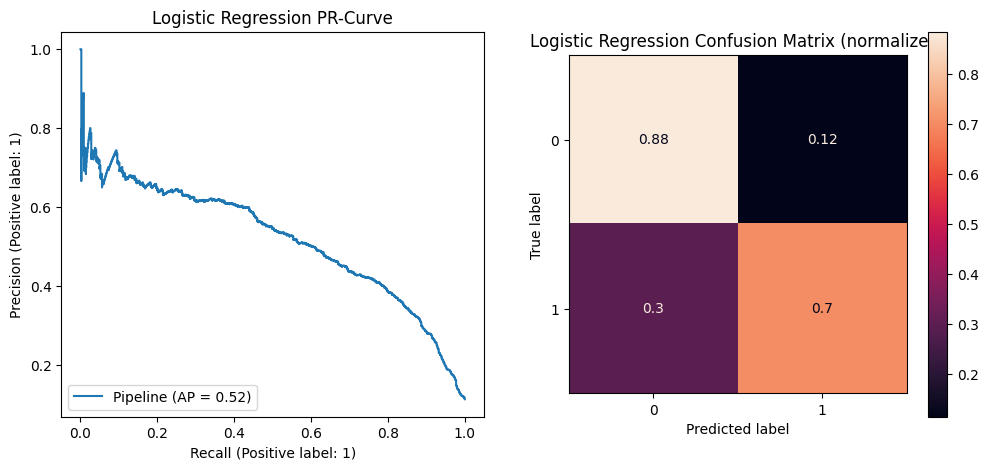

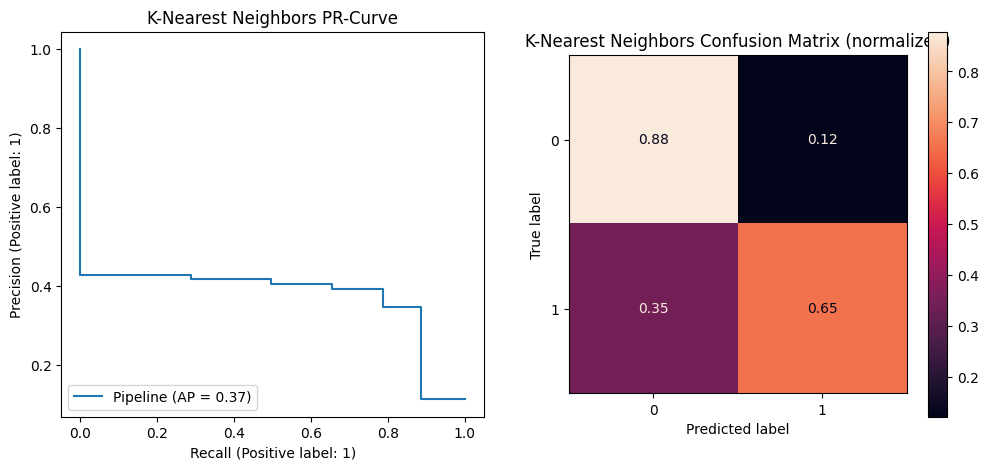

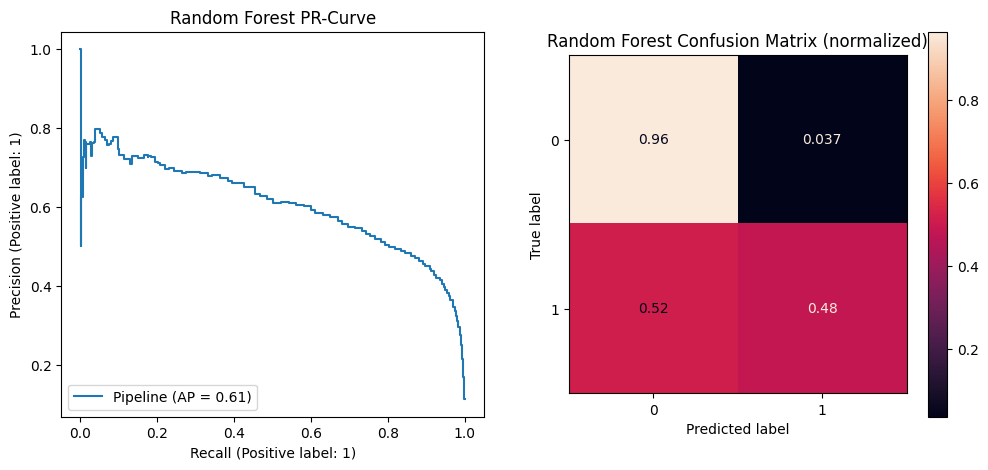

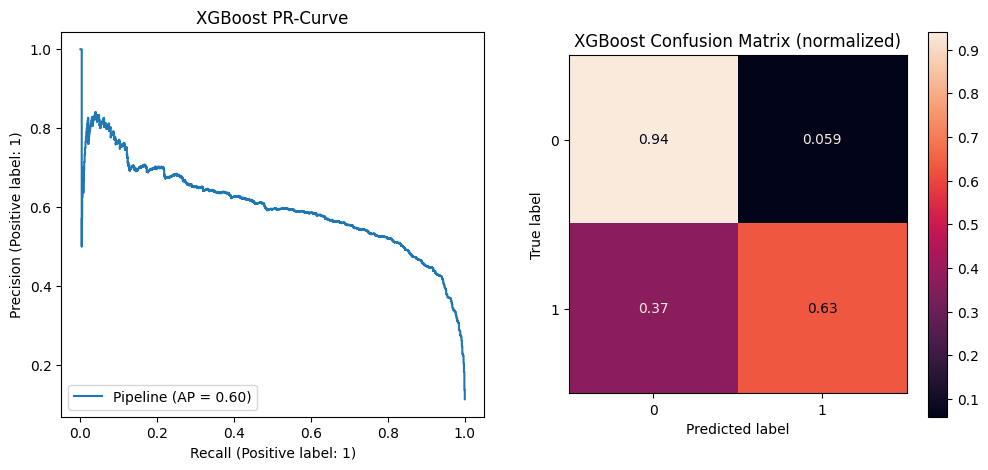

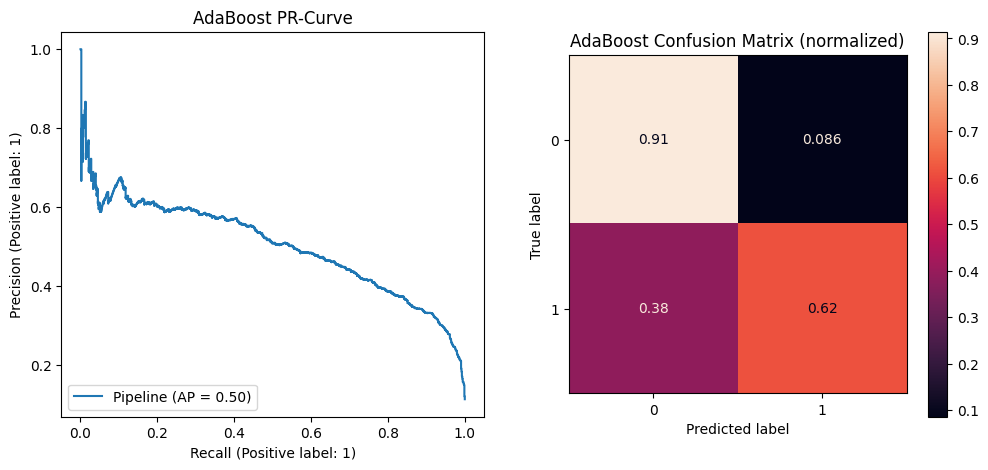

Profit without Model = 17601
Evaluation Metrics After Resampling and Hyperparameter Tuning:
                 model  recall  precision  false positive rate  profit  \
0  Logistic Regression   0.703      0.437                 0.12   18551   
3              XGBoost   0.634      0.576                 0.06   17200   
1  K-Nearest Neighbors   0.654      0.405                 0.12   17114   
4             AdaBoost   0.616      0.477                 0.09   16436   
2        Random Forest   0.485      0.628                 0.04   13255   

   fit time  score time  
0    57.929       0.025  
3    51.265       0.040  
1    50.022       0.841  
4    49.934       0.097  
2    54.952       0.157  


In [119]:
# Assuming pipelines_Resampling is defined and contains your pipelines
list_model = []
list_precision = []
list_recall = []
list_fpr = []
list_profit = []
fit_time = []
score_time = []

for name, pipeline in pipelines_Resampling:
    # Fit the model
    start = time.time()
    pipeline.fit(X_train, y_train)
    stop = time.time()
    fit_time.append(round(stop - start, 3))

    # Predict on the test set
    start = time.time()
    y_pred = pipeline.predict(X_test)
    stop = time.time()
    score_time.append(round(stop - start, 3))

    # Visualize Precision-Recall curve and Confusion Matrix
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, ax=ax[0])
    ax[0].set_title(f'{name} PR-Curve')
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, normalize='true', cmap='rocket', ax=ax[1])
    ax[1].set_title(f'{name} Confusion Matrix (normalized)')
    plt.show()

    # Compute evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    fpr = cm[0, 1] if cm.size > 1 else 0  # safe access for confusion matrix elements
    profit = profitEstimation(y_test, y_pred)

    # Store results
    list_model.append(name)
    list_precision.append(round(precision, 3))
    list_recall.append(round(recall, 3))
    list_fpr.append(round(fpr, 2))
    list_profit.append(round(profit))

# Calculate profit without model
profit_no_model = round((y_test == 1).sum() * 31.75 - len(y_test) * 1.44)

# Create DataFrame for results
df_results = pd.DataFrame({
    'model': list_model,
    'recall': list_recall,
    'precision': list_precision,
    'false positive rate': list_fpr,
    'profit': list_profit,
    'fit time': fit_time,
    'score time': score_time
}).sort_values('profit', ascending=False)

# Output results
print(f'Profit without Model = {profit_no_model}')
print("Evaluation Metrics After Resampling and Hyperparameter Tuning:")
print(df_results)

Untuk menentukan model terbaik sesuai dengan kebutuhan bisnis kita, diperlukan sebuah model yang mampu memberikan profit tertinggi kepada bisnis, yang berarti tim pemasaran akan menjadi lebih efisien dan efektif. Selain itu, kita juga memerlukan model yang memiliki kinerja yang lebih baik daripada tim pemasaran tanpa adanya model.

Jika kita ingin mendapatkan model terbaik yang paling menguntungkan, maka kita harus membandingkan recall dengan tingkat false positive. Oleh karena itu, model yang paling ideal untuk kebutuhan bisnis kita adalah **Random Forest** karena memiliki nilai recall yang cukup tinggi dan tingkat false positive rate yang cukup rendah. Hal ini sejalan dengan perhitungan profit kita yang menunjukkan bahwa **Random Forest** memiliki profi cukup tinggi.

Dengan menggunakan **Random Forest**, kita dapat memastikan bahwa model yang dipilih tidak hanya memiliki kinerja yang baik dalam mengidentifikasi data positif (recall), tetapi juga memiliki tingkat kesalahan yang rendah dalam mengidentifikasi data negatif palsu (false positive), sehingga mengoptimalkan profit bisnis secara keseluruhan.

## Feature Importance

> Feature Importance in RandomForest

In [137]:
# Ensure the pipeline setup and feature alignment are correct
feature_importance_df = pd.DataFrame()

for pipeline_name, pipeline in pipelines_Resampling:
    if 'Random Forest' in pipeline_name:
        # Set the best parameters for the Random Forest pipeline
        best_model = pipeline.set_params(**results['Random Forest']['Best Params']).fit(X_train, y_train)
        
        # Extract feature importances
        importances = best_model.named_steps['classifier'].feature_importances_
        feature_importance_df[pipeline_name] = importances
        print(f"\n{pipeline_name} Feature Importances:")
        for feature, importance in zip(X_train.columns, importances):
            print(f"{feature}: {importance}")


Random Forest Feature Importances:
age: 0.004976369696696871
job: 0.016712176995203894
marital: 0.056253743049022746
education: 0.0413393513959893
housing: 0.004980676370718432
loan: 0.009552581321404439
contact: 0.0015160721950274794
month: 0.0006432349580087995
day_of_week: 0.005513217542481226
duration: 0.002007540648036469
campaign: 0.0015586583219976185
pdays: 0.008015010446787102
previous: 0.0010962796494770985
poutcome: 0.009713247724826433
emp.var.rate: 0.0009505838713624635
cons.price.idx: 0.001518978942265184
cons.conf.idx: 0.002471021313819559
euribor3m: 0.0017974904235799382
nr.employed: 0.00888287744819321


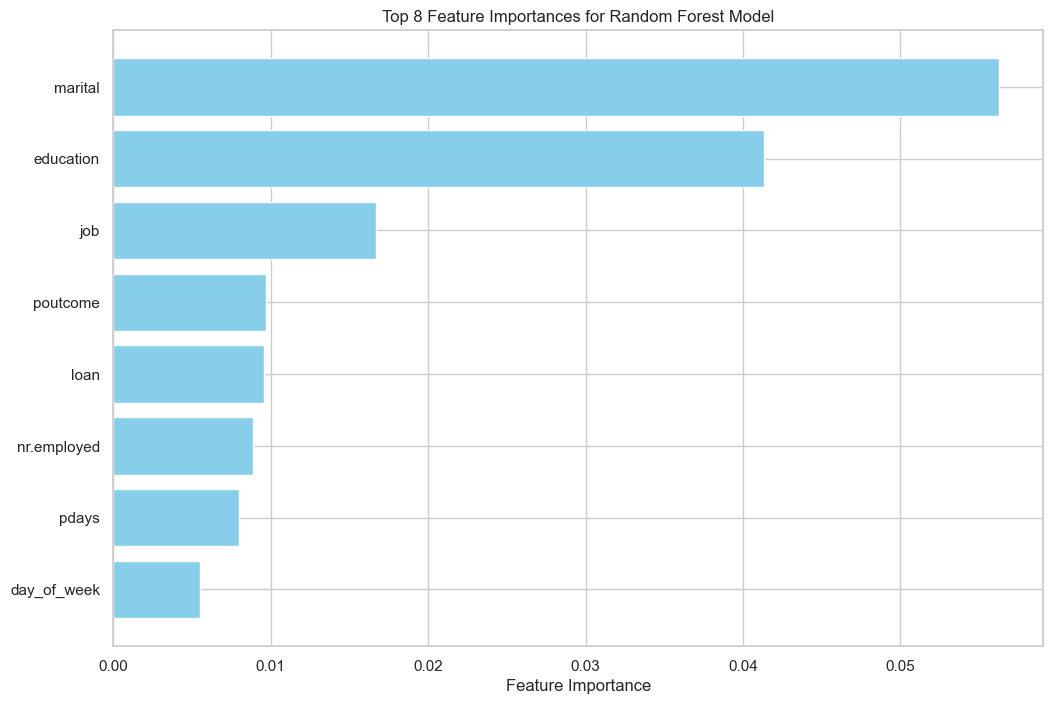

In [147]:
# Feature importances as given
features = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 
            'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
importances = [0.004976369696696871, 0.016712176995203894, 0.056253743049022746, 
               0.0413393513959893, 0.004980676370718432, 0.009552581321404439, 
               0.0015160721950274794, 0.0006432349580087995, 0.005513217542481226, 
               0.002007540648036469, 0.0015586583219976185, 0.008015010446787102, 
               0.0010962796494770985, 0.009713247724826433, 0.0009505838713624635, 
               0.001518978942265184, 0.002471021313819559, 0.0017974904235799382, 
               0.00888287744819321]

# Sort indices based on importances in descending order
sorted_indices = sorted(range(len(importances)), key=lambda k: importances[k], reverse=True)

# Select the top 8 features and their importances
top_features = [features[idx] for idx in sorted_indices[:8]]
top_importances = [importances[idx] for idx in sorted_indices[:8]]

# Plotting the top 8 features
plt.figure(figsize=(12, 8))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 8 Feature Importances for Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


Top 2 fitur paling penting berdasarkan model XGBoost, yaitu **Marital**, dan **Education**. Hal ini cukup sesuai dengan EDA kita sebelumnya, yang mana ketiga fitur tersebut memang memiliki hubungan dengan target sebagai berikut:
- marital : target cenderung yes pada status pernikahan `single`.
- education : target cenderung yes pada status pendidikan `university.degree`


## **6. Conclusion and Recommendation**

#### **Conclusion**

**Karakteristik nasabah yang melakukan deposito:**

- Nasabah yang cenderung melakukan deposito memiliki karakteristik yang cukup jelas. Mereka umumnya berasal dari kelompok usia `teenage` dan `elderly`, dengan mayoritas terdiri dari pelajar dan pensiunan. Selain itu, nasabah yang belum menikah (single) dan memiliki tingkat pendidikan universitas (university degree) juga cenderung lebih condong untuk melakukan deposito
- Jenis kontak yang paling diminati nasabah untuk melakukan deposito adalah `Cellular` dengan durasi `rata-rata 516.48 detik`.
- Waktu terbaik untuk menghubungi nasabah adalah pada bulan **(Maret, Desember dan September)** dan dilakukan pada saat `euribor3m` rate sedang turun atau dibawah 2.
- Nasabah yang sebelumnya sudah pernah melakukan deposito (**success**) memiliki kecenderungan untuk deposito lebih tinggi dibandingkan failure atau nonexistent.
- Nasabah cenderung berlangganan deposito berjangka ketika situasi ketenagakerjaan memburuk (emp.var.rate negatif). 


**Karakteristik model machine learning yang didapat:**

- Metric utama yang kita gunakan adalah **recall**, karena meminimalkan False Negative kita anggap lebih penting dibandingkan False Positive.
- Model terbaik yang kita gunakan adalah model **Random Forest** benchmark dengan SMOTEN.
- Berdasarkan model Random Forest, fitur/kolom yang paling berpengaruh terhadap target (Deposit) adalah `marital` dan `education`.
- **Precision** = 0.6 yang berarti dari total pelanggan yang diklasifikasikan deposit, hanya **6%**-nya yang berhasil terprediksi dengan benar.
- **Recall** =  0.48 yang berarti dari total nasabah yang aslinya deposit, **48%**-nya berhasil diprediksi dengan benar.
- **False Positive Rate** (aktualnya tidak deposit, diprediksi deposit) = **37%**
- **False Negative Rate** (aktualnya deposit, diprediksi tidak deposit) = **52%**

#### **Recommendation**

Beberapa langkah aksi yang dapat dilakukan perusahaan untuk meningkatkan jumlah nasabah yang akan deposito di antaranya :
- Lebih memfokuskan upaya marketing kita kepada kategori usia **teenage** dan **elderly** karena memiliki persentase subscribe lebih besar dibandingkan kelompok usia lain.
- Lebih memfokuskan upaya marketing kita kepada kategori pekerjaan **student** dan **retired** karena memiliki persentase subscribe 2-4x lebih besar dibandingkan pekerjaan lain.
- Lebih memfokuskan upaya marketing kita kepada kategori status pernikahan **single** karena memiliki persentase subscribe lebih besar dibandingkan status pernikahan lain.
- Lebih memfokuskan upaya marketing kita kepada kategori pendidikan **university degree** karena memiliki jumlah lebih besar dibandingkan pekerjaan lain.
- Melakukan kontak melalui **cellular** saja karena dapat meningkatkan kemungkinan deposito serta meningkatkan produktivitas (rata-rata durasi yang lebih cepat). Selain itu ketika ada nasabah yang baru mendaftar agar dipastikan untuk mencantumkan nomor cellullar.
- Meningkatkan upaya marketing pada bulan **(Maret, Desember dan September)** karena memiliki kemungkinan subscribe lebih tinggi dibandingkan bulan lain.
- Melakukan marketing kepada nasabah ketika **euribor 3-month rate sedang turun atau di bawah 2**.
- Mengutamakan kelompok nasabah yang sebelumnya sudah pernah melakukan deposito (**success**) untuk ditawarkan deposito.

Rekomendasi Machine Learning untuk Analisis Selanjutnya pada nasabah yang melakukan deposito:
Memanfaatkan teknik seperti SHAP (SHapley Additive exPlanations) atau LIME (Local Interpretable Model-agnostic Explanations) untuk menjelaskan prediksi model dengan lebih efektif.

### **Link Tableau**

https://public.tableau.com/app/profile/nur.hafizah3798/viz/GroupDeltaFinproBankMarketingCampaign/DemografiDashboard?publish=yes